En esta sección el proposito es automatizar el pipeline del machine learning:

> Extracción de de base de datos ->**Analisis de datos** -> ingenieria de caracteristicas -> Selección de caracteristicas -> Creación del modelo -> Predicción

Para al implementación del pipeline de machine learning se hace usa de la base de datos [Houses Prices](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data?select=data_description.txt).

In [1]:
# manejo de bases de datos
import pandas as pd
import numpy as np

# creación de graficas
import matplotlib.pyplot as plt
import seaborn as sns

# analisis estadisitico
import scipy.stats as stats

# Mostrar todas las columnas en el pandas data frame
pd.pandas.set_option('display.max_columns', None)

# Carga de los datos

In [2]:
# Cargar conjunto de datos
data = pd.read_csv('./data/train.csv')

# Dimensiones de la base de datos
print(data.shape)

# Ver el conjunto de datos
data.head()


(1460, 81)


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [3]:
# Eliminar el indicador de cada casa, ya que no da información caracteristica de cada casa
data.drop(columns='Id', inplace=True)

## Analisis variable objetivo

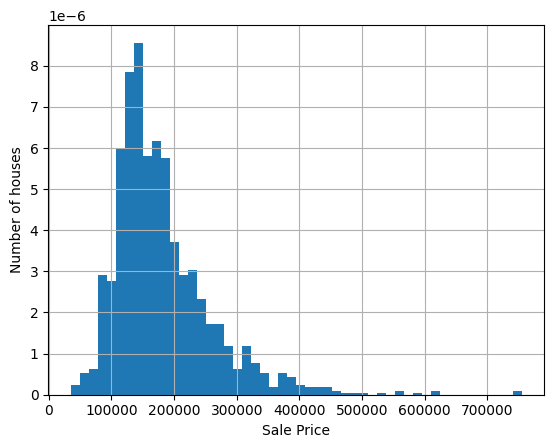

In [9]:
# Histograma de la variable a predecir (Se hacen 50 particiones)

data['SalePrice'].hist(bins=50, density=True)
plt.ylabel('Number of houses')
plt.xlabel('Sale Price')
plt.show()

Se observa una variable continua y sesgada a las derecha por lo que puede ser util realizar una tranformación númerica a la variable apuntando a reducir el sesgo.

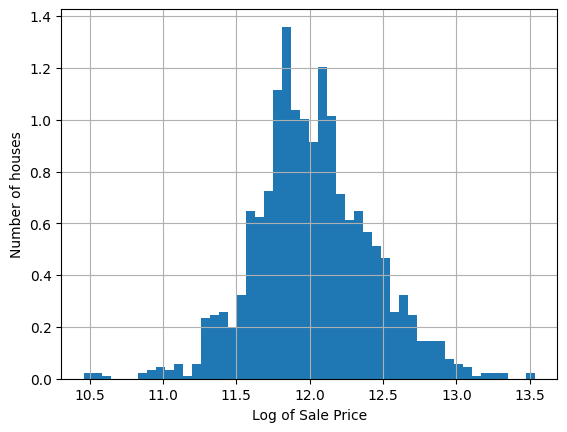

In [10]:
# Tranformar la variable usando log

np.log(data['SalePrice']).hist(bins=50, density=True)
plt.ylabel('Number of houses')
plt.xlabel('Log of Sale Price')
plt.show()

# Analisis caracteristicas

Tratamos de indentificar variable categoricas de manera automatica

In [11]:
# Extracción de las variable tipo object

cat_vars = [var for var in data.columns if data[var].dtype == 'O']

# Aunque la variable MSSubClass se codifica como una variable númeroca, en la definición de las 
# variable se puede observar que corresponde a una categoria
cat_vars = cat_vars + ['MSSubClass']

# Numero de variables categoricas
len(cat_vars)

44

In [12]:
# Convsetir todas las variable a categoricas
data[cat_vars] = data[cat_vars].astype('O')

Identificamos las variables numericas

In [13]:
# Identificación de las variable númericas

num_vars = [
    var for var in data.columns if var not in cat_vars and var != 'SalePrice'
]

# Total de variable númericas
len(num_vars)

35

# Valores faltastes

In [14]:
# Listas las variables que contienen valores faltantes
vars_with_na = [var for var in data.columns if data[var].isnull().sum() > 0]

# Calcular el procentaje de valores vacios

data[vars_with_na].isnull().mean().sort_values(ascending=False)

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
FireplaceQu     0.472603
LotFrontage     0.177397
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
BsmtExposure    0.026027
BsmtFinType2    0.026027
BsmtFinType1    0.025342
BsmtCond        0.025342
BsmtQual        0.025342
MasVnrArea      0.005479
MasVnrType      0.005479
Electrical      0.000685
dtype: float64

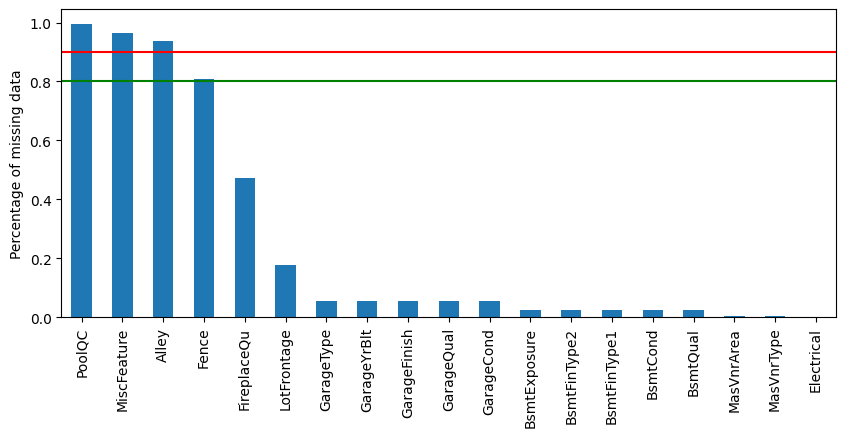

In [15]:
# Resultado anterior de manera grafica

data[vars_with_na].isnull().mean().sort_values(
    ascending=False).plot.bar(figsize=(10, 4))
plt.ylabel('Percentage of missing data')
plt.axhline(y=0.90, color='r', linestyle='-')
plt.axhline(y=0.80, color='g', linestyle='-')

plt.show()

In [16]:
# Determinar de todos los na cuales corresponde a variable numericas y cuales a categoricas

cat_na = [var for var in cat_vars if var in vars_with_na]
num_na = [var for var in num_vars if var in vars_with_na]

print('Categoricas: ', len(cat_na))
print('Numericas: ', len(num_na))

Categoricas:  16
Numericas:  3


# Estudio del patron de omision de datos

In [17]:
def analyse_na_value(df, var):
    
    df = df.copy()

    df[var] = np.where(df[var].isnull(), 1, 0)

    # usamos la media y la std para compara si las observaciones con valores
    # nulos proviene de una distribución diferente a las observaciones no nulas
    tmp = df.groupby(var)['SalePrice'].agg(['mean', 'std'])

    # plot
    tmp.plot(kind="barh", y="mean", legend=False,
             xerr="std", title="Sale Price", color='green')

    plt.show()

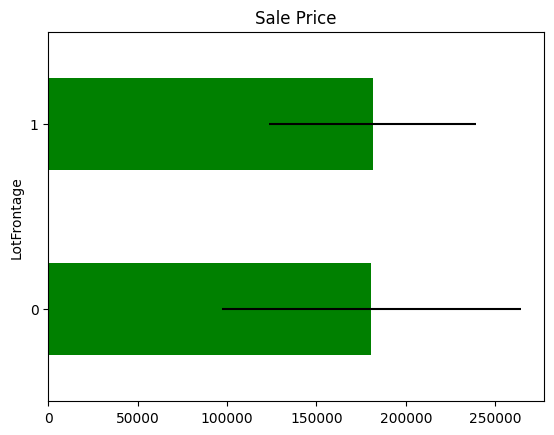

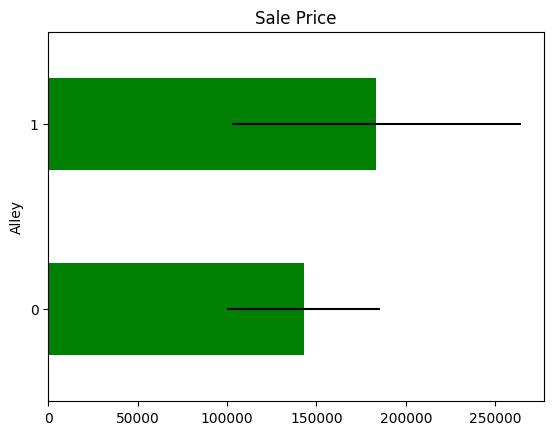

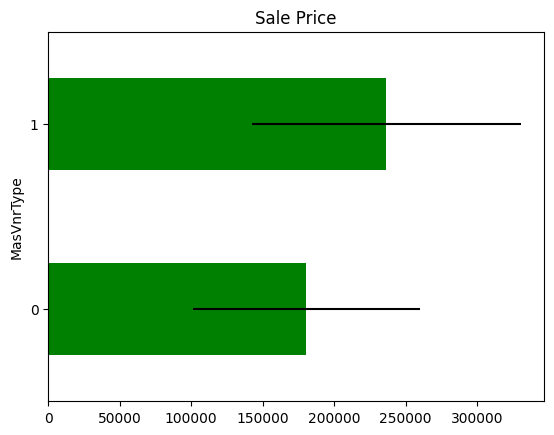

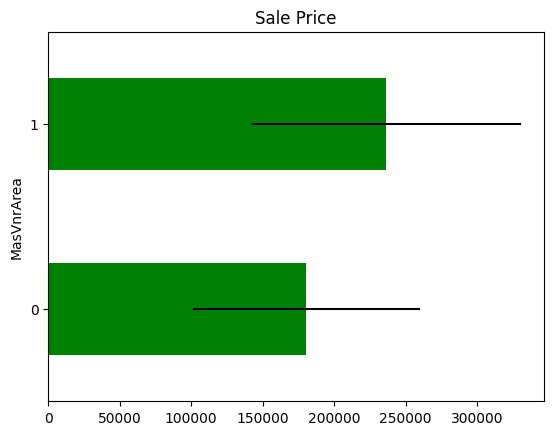

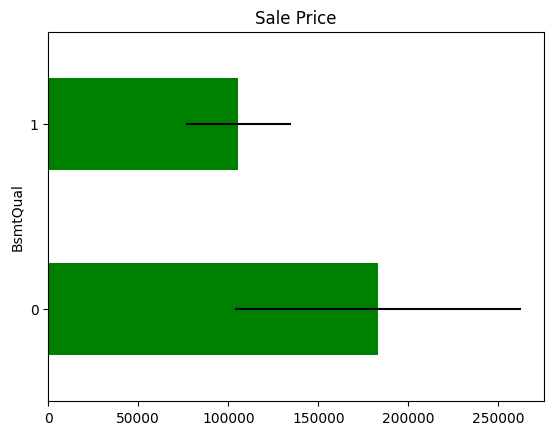

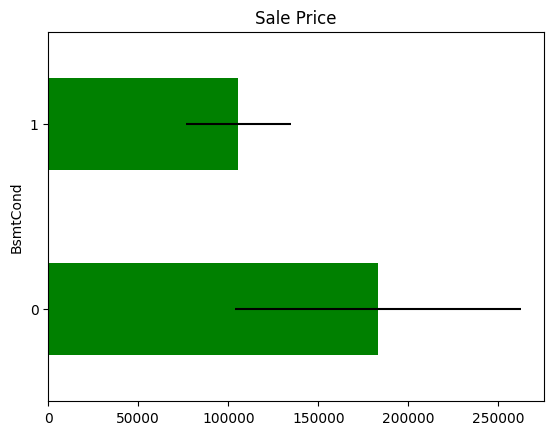

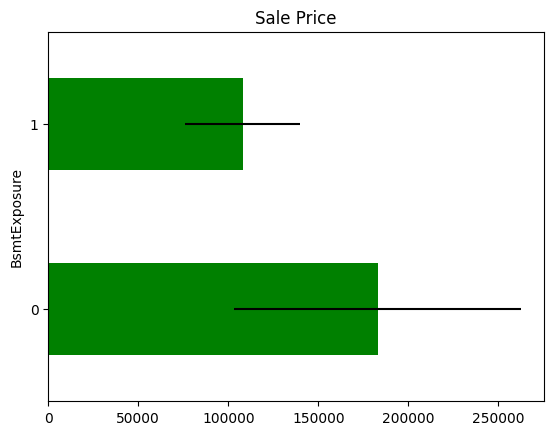

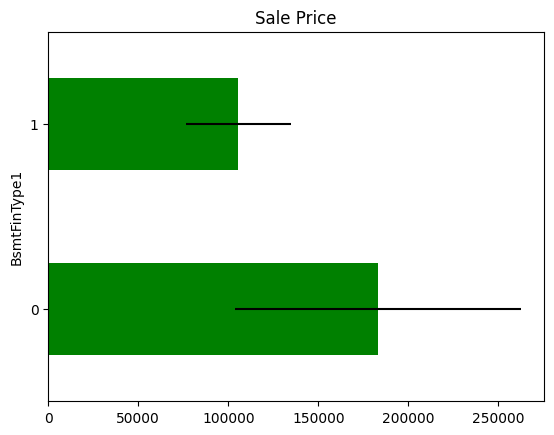

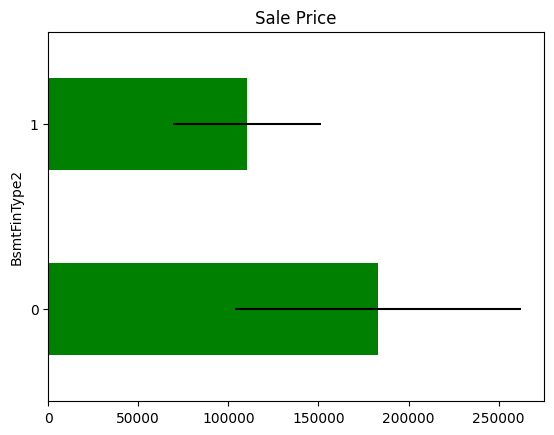

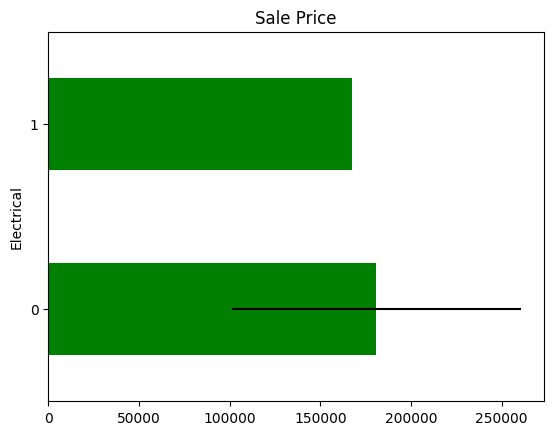

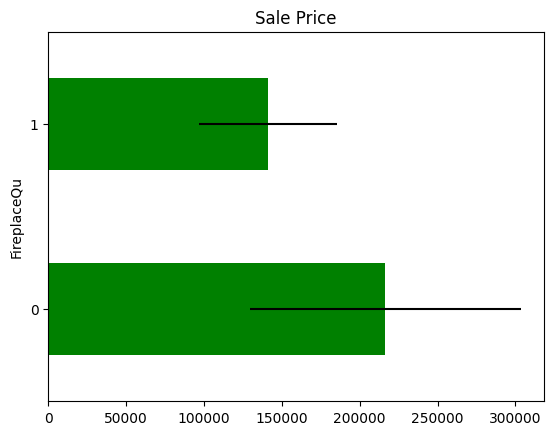

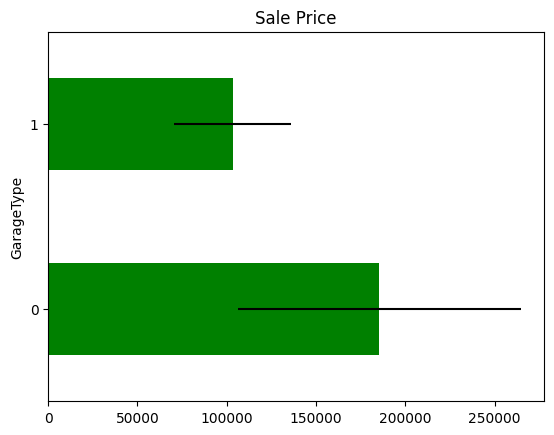

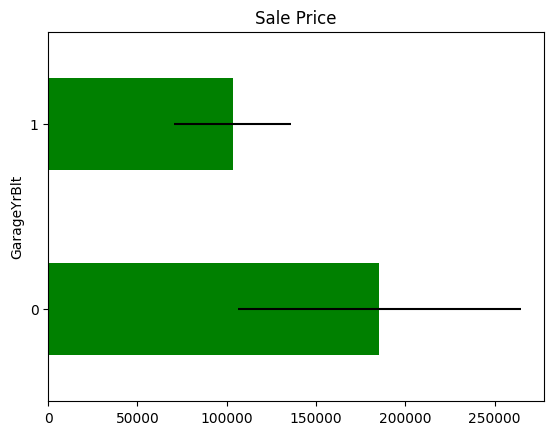

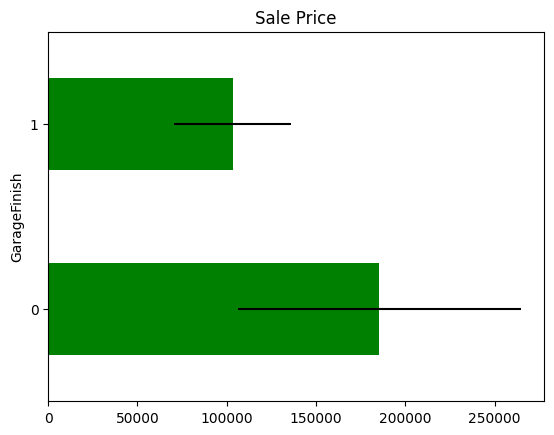

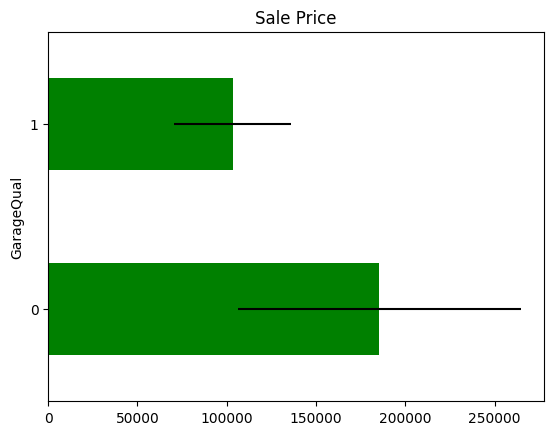

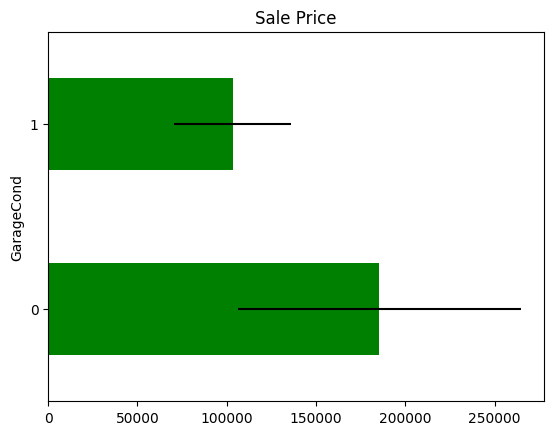

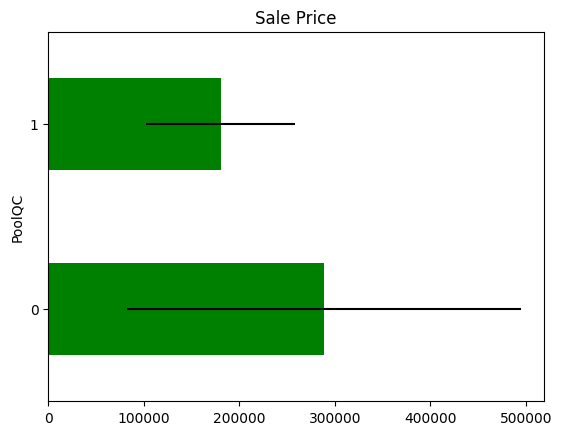

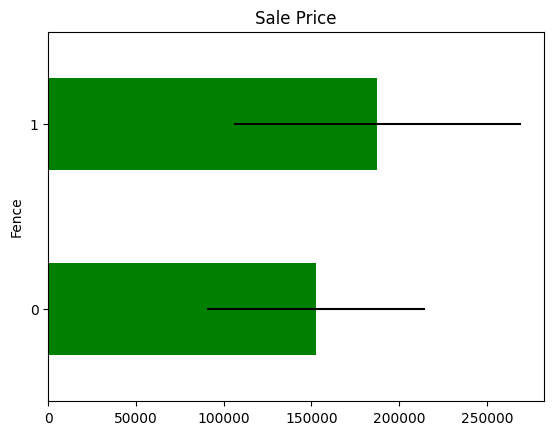

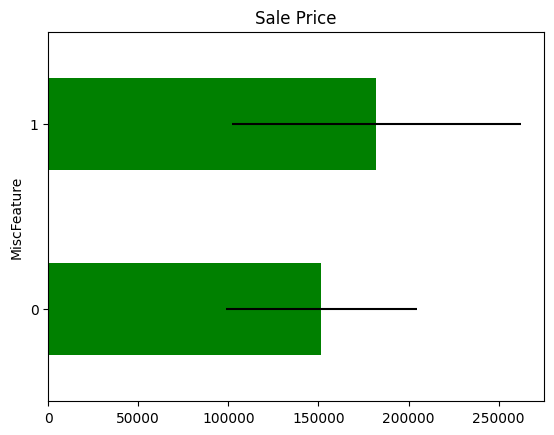

In [18]:
# Aplicación de la funcion sobre cada variable con nulos

for var in vars_with_na:
    analyse_na_value(data, var)

En algunas variable el promedio es diferentes cuando la informacion es y no es vacia. Lo que puede sugerir que los na pueden ser un buen predictor

# Estudio variable temporales

In [19]:
# Lista de variables temporales

year_vars = [var for var in num_vars if 'Yr' in var or 'Year' in var]

year_vars

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

Text(0, 0.5, 'Median House Price')

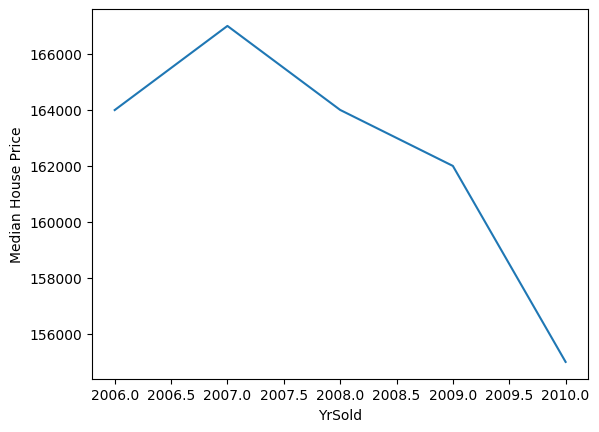

In [20]:
# Grafico del precio de la casa vs la fecha de venta

data.groupby('YrSold')['SalePrice'].median().plot()
plt.ylabel('Median House Price')

Se ve un decremento en el precio de venta a medida que ha pasado el tiempo.

Text(0, 0.5, 'Median House Price')

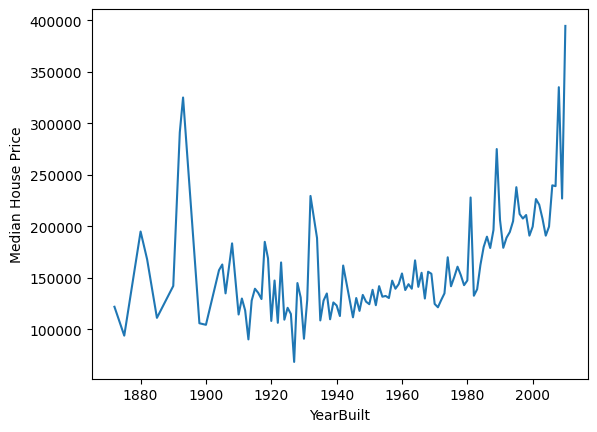

In [21]:
# Grafico del precio de la casa vs la fecha de construccion

data.groupby('YearBuilt')['SalePrice'].median().plot()
plt.ylabel('Median House Price')

Se observa como las casas mas nuevas tienden a ser mas costosas. Tambien peude deberse a que en los ultimos años se han vendido casas mas costosas. Se crea una funcion para determinar si el año de construccion en realidad afrecta el predio de venta

In [22]:

def analyse_year_vars(df, var):
    
    df = df.copy()
    
    # Analizar al diferencia entre las variables temporales y el año en que la casase vendio
    df[var] = df['YrSold'] - df[var]
    
    df.groupby('YrSold')[var].median().plot()
    plt.ylabel('Time from ' + var)
    plt.show()

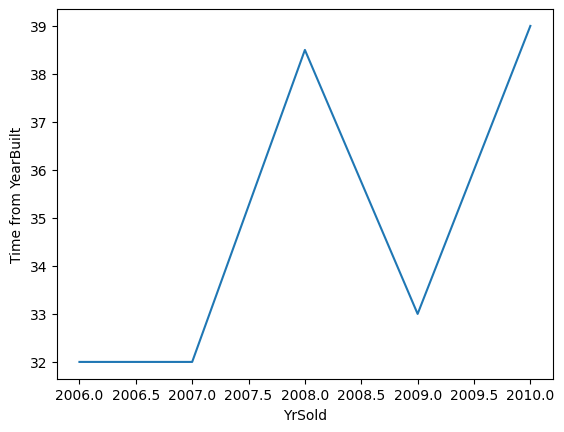

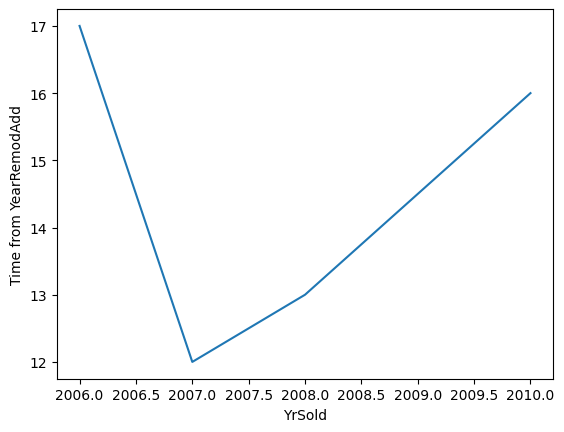

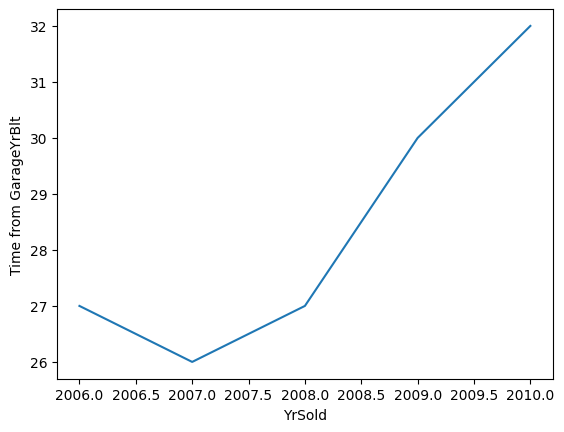

In [23]:
for var in year_vars:
    if var !='YrSold':
        analyse_year_vars(data, var)

Se pueden ver que cerca de 2010 los garages son mas antiguos y las remodelaciones tambien, lo que puede explicar porque se visualizan precios mas bajos en los años recientes.

A continuación, queremos ver si existe relaciones entre las variables temporales

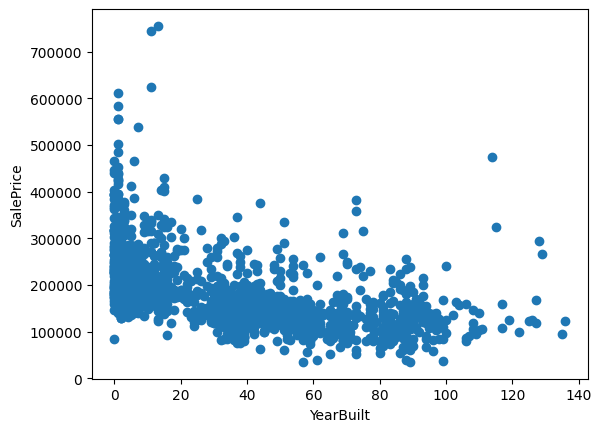

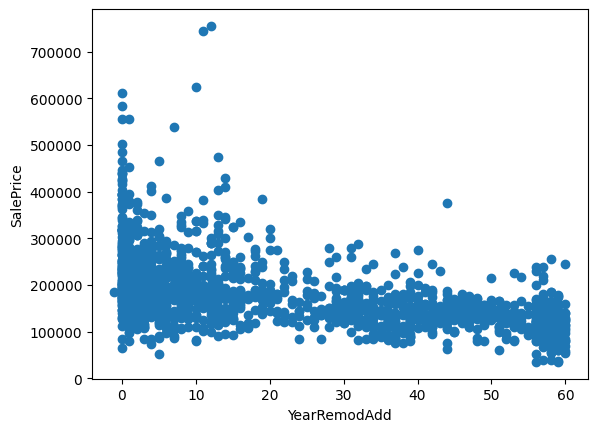

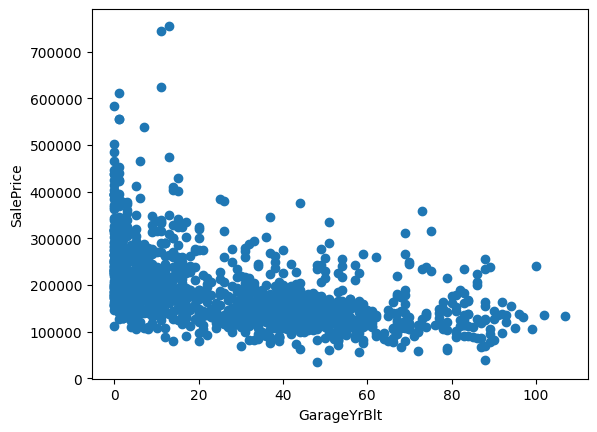

In [24]:
def analyse_year_vars(df, var):
    
    df = df.copy()
    
    df[var] = df['YrSold'] - df[var]
    
    plt.scatter(df[var], df['SalePrice'])
    plt.ylabel('SalePrice')
    plt.xlabel(var)
    plt.show()
    
    
for var in year_vars:
    if var !='YrSold':
        analyse_year_vars(data, var)

Se puede ver como amedida que las reparaciones son mas antoguas el precio comienza a decrecer

# Analisis de variables discretas

In [25]:
#  Representacion de aquellas variables numericas con menos de 20 niveles
discrete_vars = [var for var in num_vars if len(
    data[var].unique()) < 20 and var not in year_vars]


print('Number of discrete variables: ', len(discrete_vars))

Number of discrete variables:  13


In [26]:
# Veamos cuales variables cumplen el criterio anterior

data[discrete_vars].head()

OverallQual  OverallCond  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
0            7            5             1             0         2         1   
1            6            8             0             1         2         0   
2            7            5             1             0         2         1   
3            7            5             1             0         1         0   
4            8            5             1             0         2         1   

   BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageCars  PoolArea  \
0             3             1             8           0           2         0   
1             3             1             6           1           2         0   
2             3             1             6           1           2         0   
3             3             1             7           1           3         0   
4             4             1             9           1           3         0   

   MoSold  
0       2  
1       5  
2       9  
3       2  
4      12

Analizaremos su contribución y su relación con el precio de venta

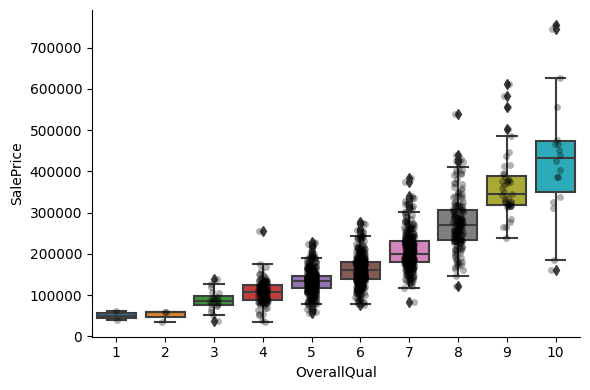

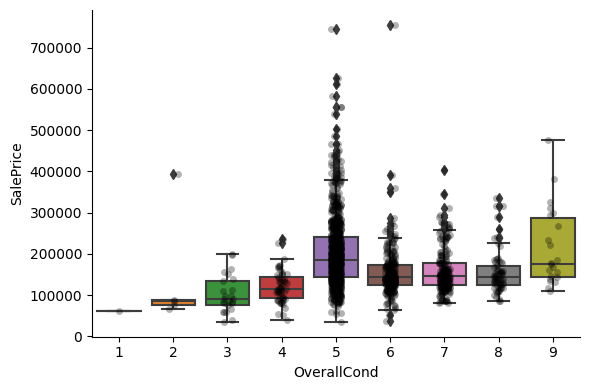

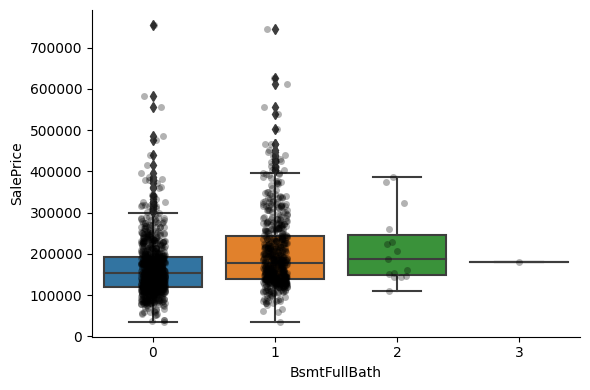

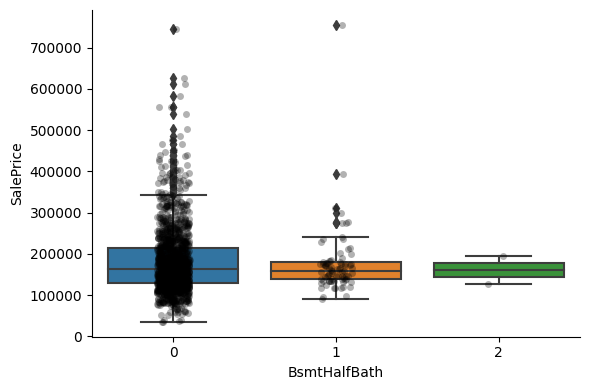

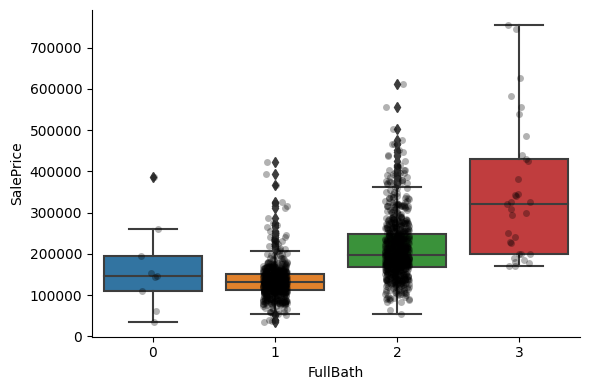

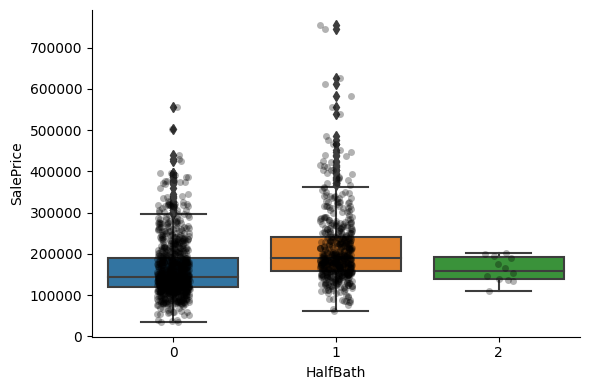

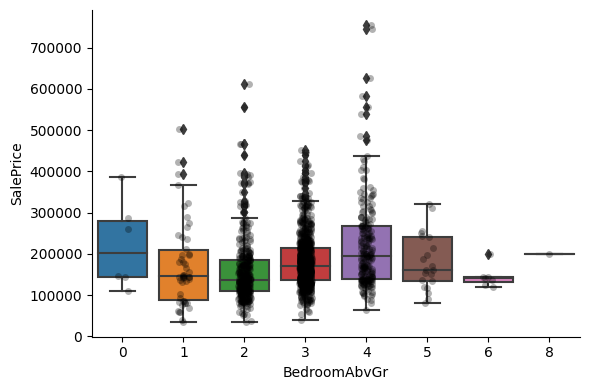

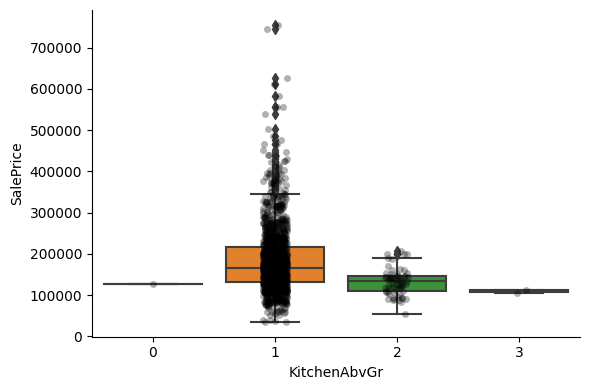

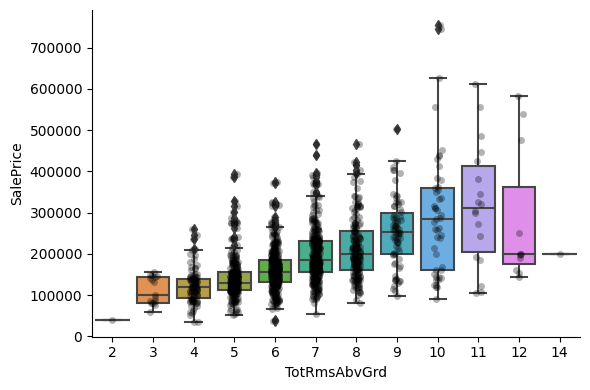

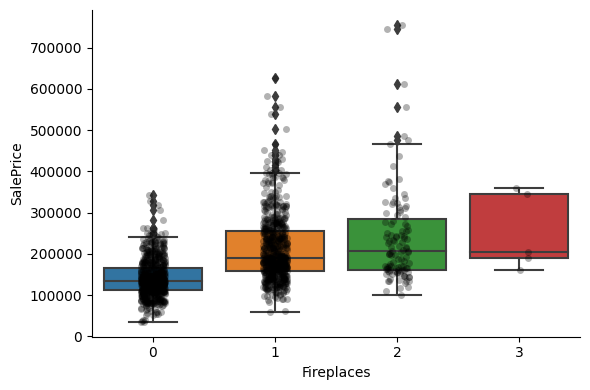

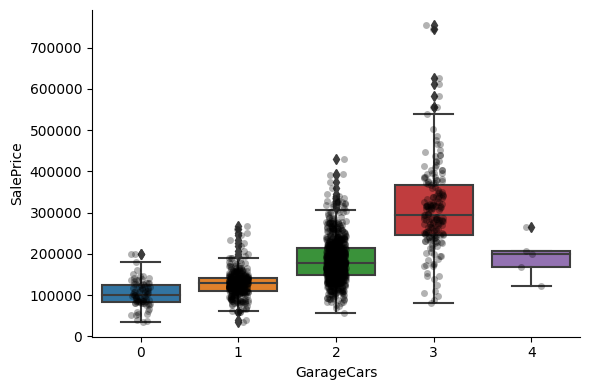

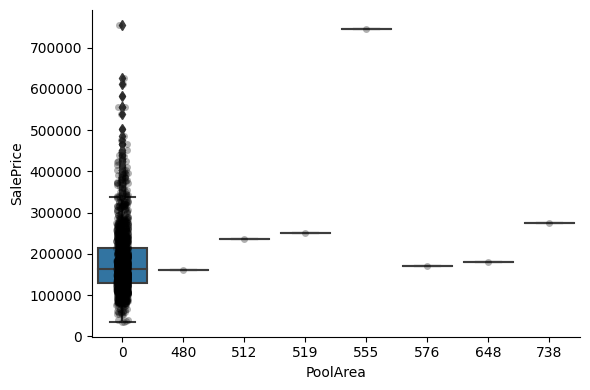

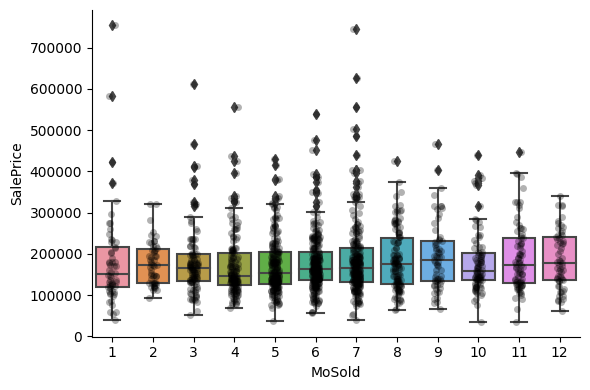

In [27]:
for var in discrete_vars:
    # make boxplot with Catplot
    sns.catplot(x=var, y='SalePrice', data=data, kind="box", height=4, aspect=1.5)
    # add data points to boxplot with stripplot
    sns.stripplot(x=var, y='SalePrice', data=data, jitter=0.1, alpha=0.3, color='k')
    plt.show()

Vemos un incremento en el precio de venta, con la calidad, la condición general, el numero de habitaciones y la superficie.

# Analisis variables continuas

In [28]:
# Lista de variables continuas
cont_vars = [
    var for var in num_vars if var not in discrete_vars+year_vars]

print('Number of continuous variables: ', len(cont_vars))

Number of continuous variables:  18


In [29]:
# Visualizacion de las variables continuas

data[cont_vars].head()

LotFrontage  LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0         65.0     8450       196.0         706           0        150   
1         80.0     9600         0.0         978           0        284   
2         68.0    11250       162.0         486           0        434   
3         60.0     9550         0.0         216           0        540   
4         84.0    14260       350.0         655           0        490   

   TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  GarageArea  \
0          856       856       854             0       1710         548   
1         1262      1262         0             0       1262         460   
2          920       920       866             0       1786         608   
3          756       961       756             0       1717         642   
4         1145      1145      1053             0       2198         836   

   WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  MiscVal  
0           0           61              0          0            0        0  
1         298            0              0          0            0        0  
2           0           42              0          0            0        0  
3           0           35            272          0            0        0  
4         192           84              0          0            0        0

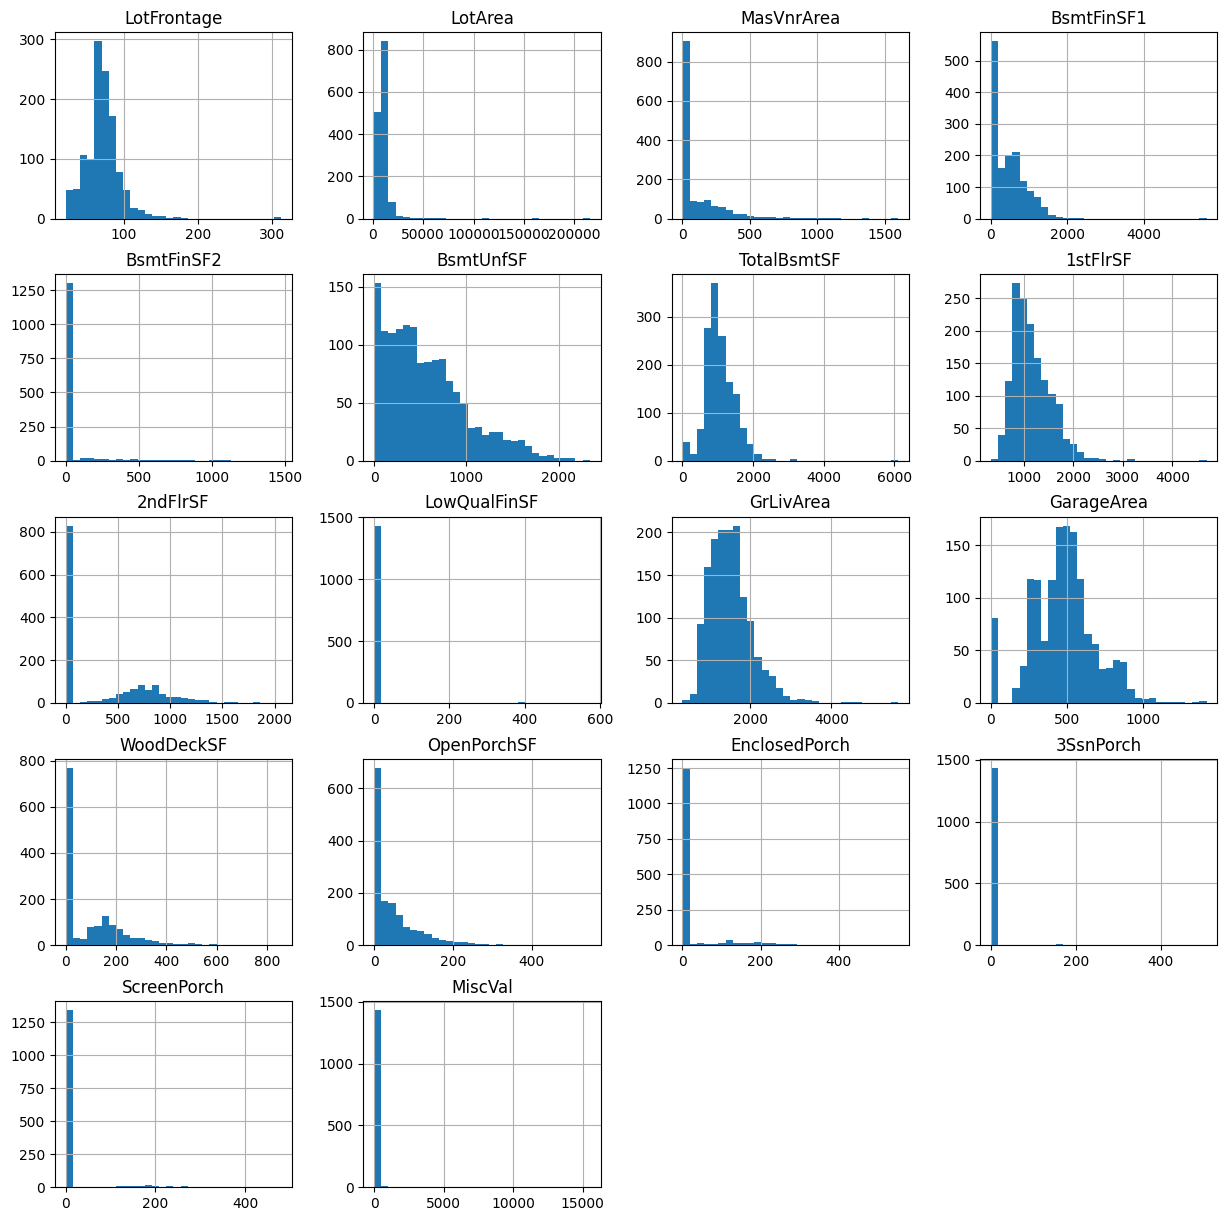

In [30]:
# Plot de histograma para todas las variables continuas

data[cont_vars].hist(bins=30, figsize=(15,15))
plt.show()

Se puede ver que las variables se encuentran sesgadas. A continuación, podemos tratar de normalizar las distribuciones aplicando transformaciónes. Es probable que estas transformaciones no funcionen para variables fuertemente sesgadas.

In [31]:
# Seleccion de variables  altamente sesgadas

skewed = [
    'BsmtFinSF2', 'LowQualFinSF', 'EnclosedPorch',
    '3SsnPorch', 'ScreenPorch', 'MiscVal'
]

In [32]:
# resto de variables continuas

cont_vars = [
    'LotFrontage',
    'LotArea',
    'MasVnrArea',
    'BsmtFinSF1',
    'BsmtUnfSF',
    'TotalBsmtSF',
    '1stFlrSF',
    '2ndFlrSF',
    'GrLivArea',
    'GarageArea',
    'WoodDeckSF',
    'OpenPorchSF',
]

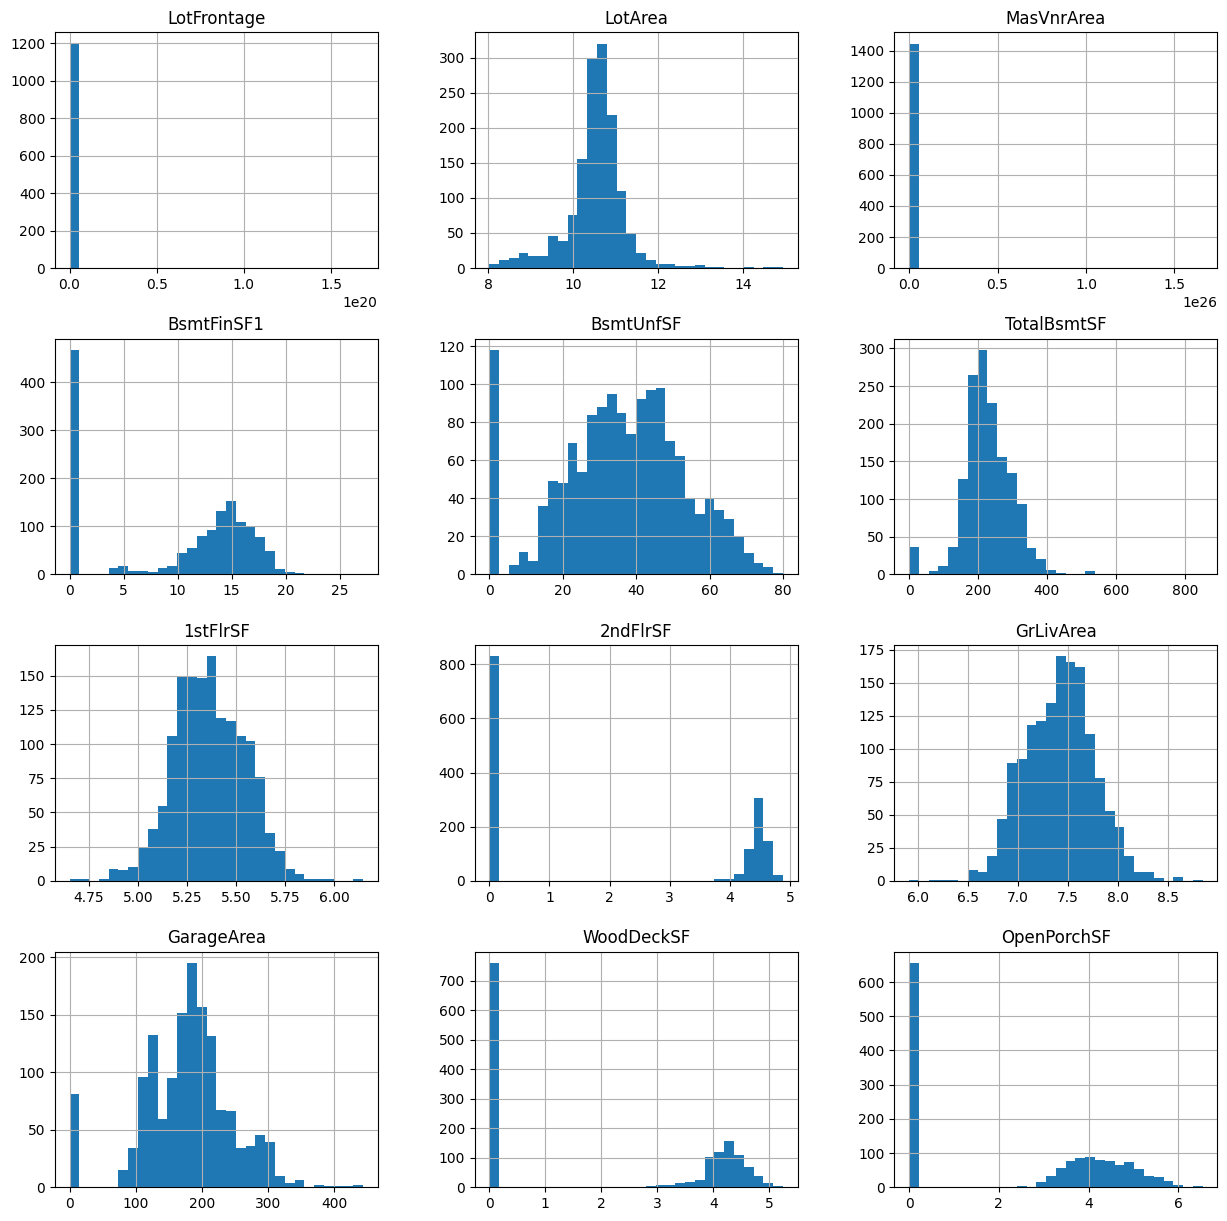

In [33]:

tmp = data.copy()

for var in cont_vars:

    # transformacion yeo sobre las variables
    tmp[var], param = stats.yeojohnson(data[var])

    
# graficos de las variables transformadas
tmp[cont_vars].hist(bins=30, figsize=(15,15))
plt.show()

Se puede entrenar el modelo con las variables normales y con las variables transformadas

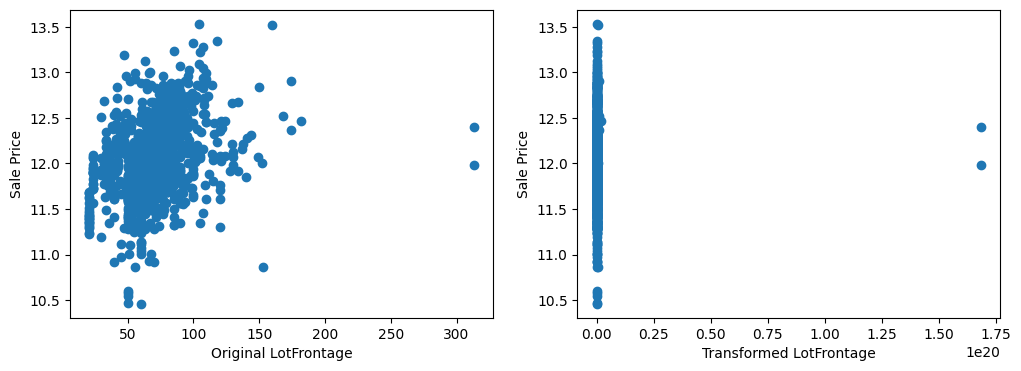

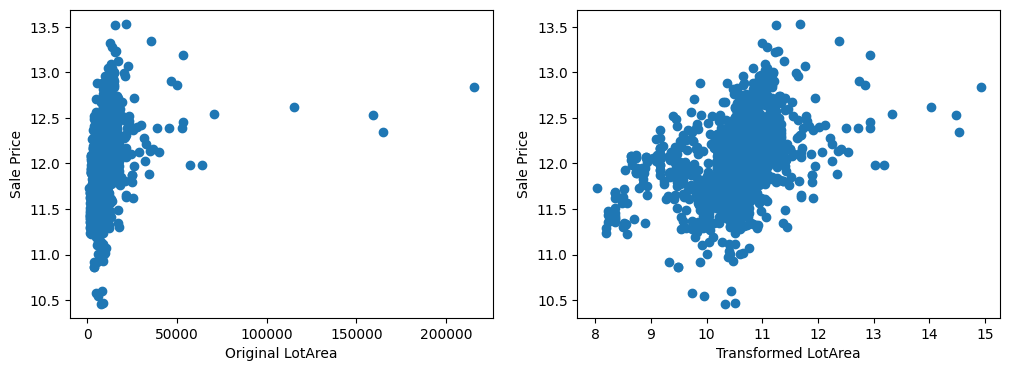

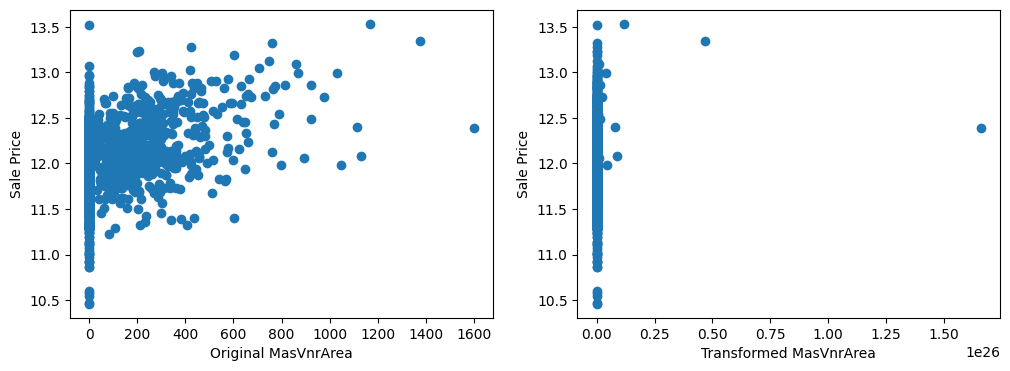

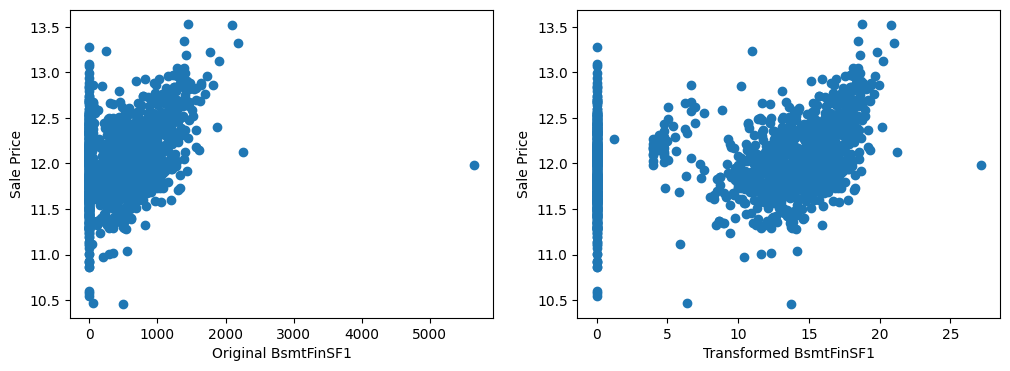

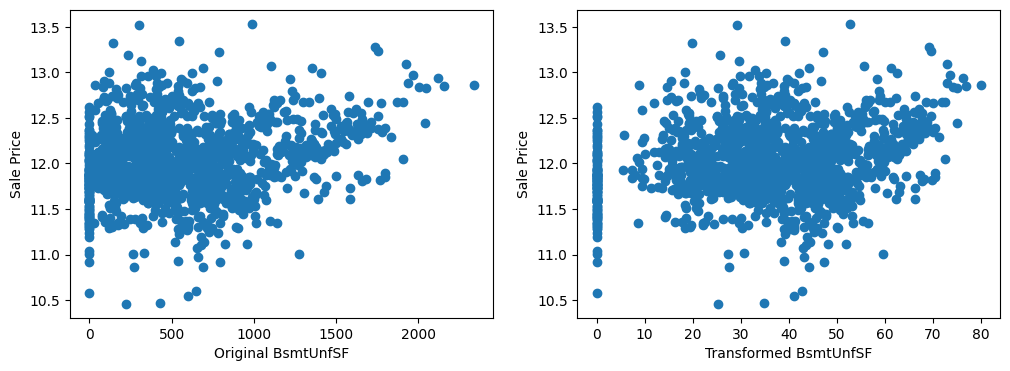

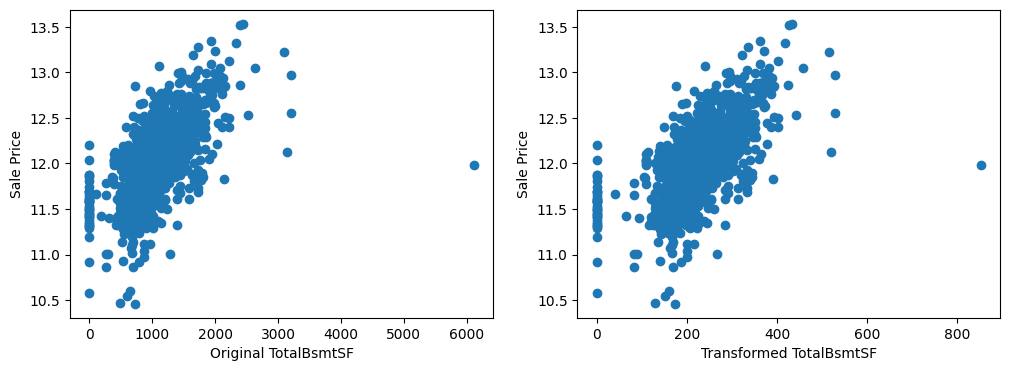

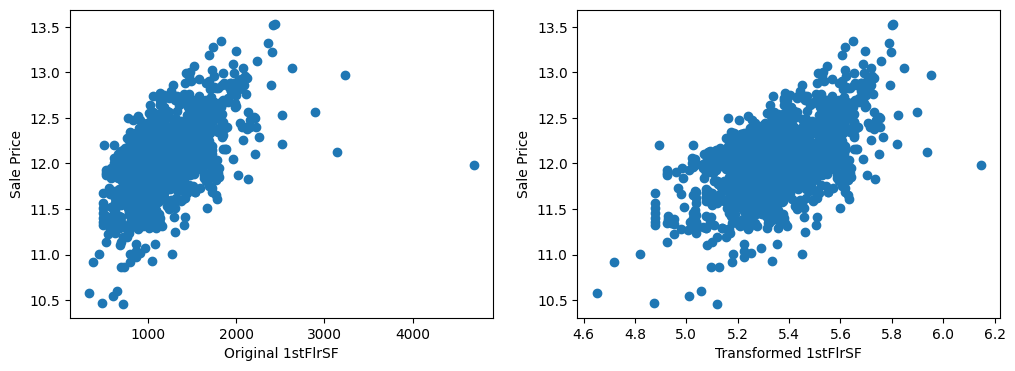

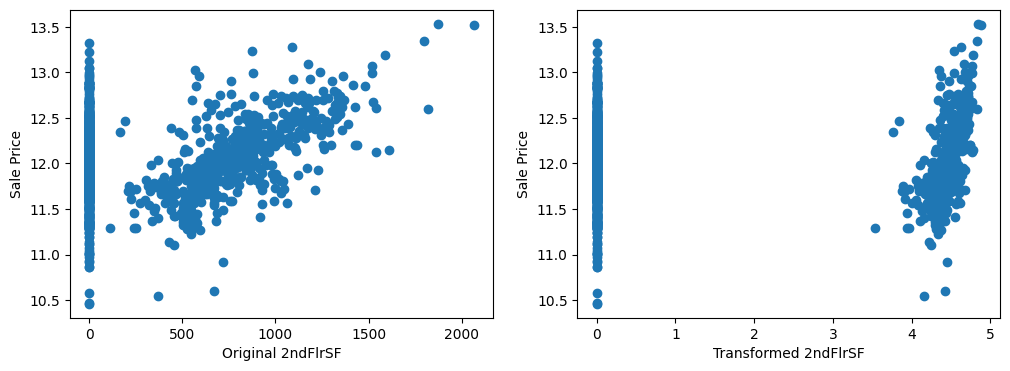

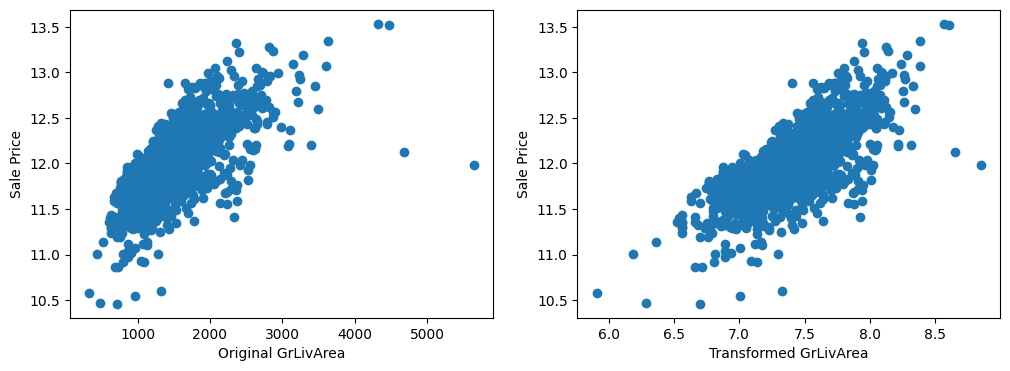

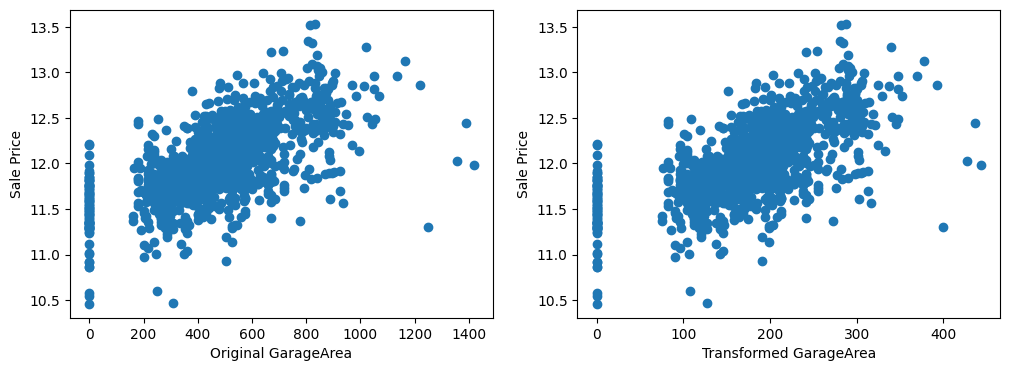

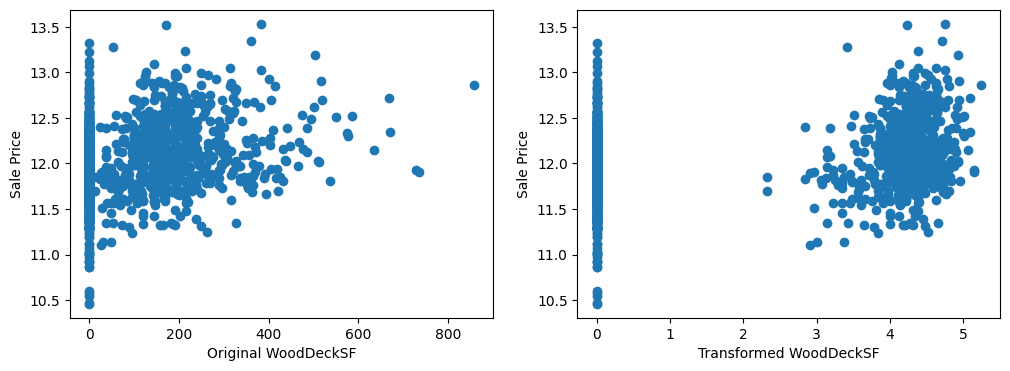

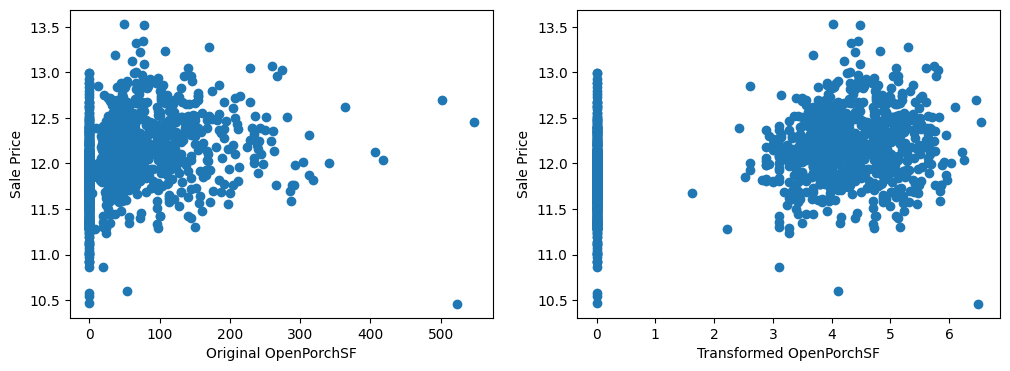

In [34]:
# Exporar como como se alterar la relación con Y al transformas las variables

for var in cont_vars:
    
    plt.figure(figsize=(12,4))
    
    # Grafica variables sin tranformar  
    plt.subplot(1, 2, 1)
    plt.scatter(data[var], np.log(data['SalePrice']))
    plt.ylabel('Sale Price')
    plt.xlabel('Original ' + var)

    # Grafico variables transformadas
    plt.subplot(1, 2, 2)
    plt.scatter(tmp[var], np.log(tmp['SalePrice']))
    plt.ylabel('Sale Price')
    plt.xlabel('Transformed ' + var)
                
    plt.show()

En algunas variables se puede apreciar como la transfromación mejora la relación. A contuniación, se intentara una tranformación difernetes con aquellas variables que no tienen valores en cero.

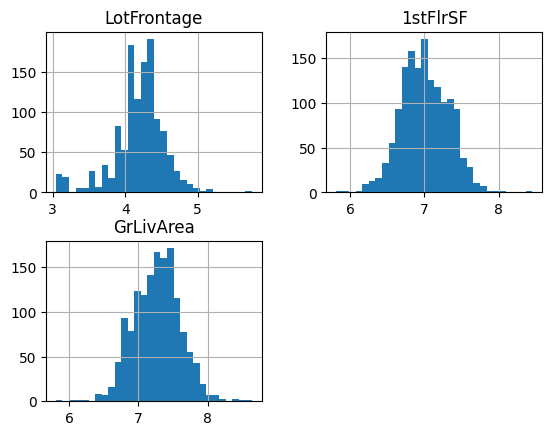

In [35]:
# Distribución de las variables despues de aplicar transformación logaritmica

tmp = data.copy()

for var in ["LotFrontage", "1stFlrSF", "GrLivArea"]:

    # transform the variable with logarithm
    tmp[var] = np.log(data[var])
    
tmp[["LotFrontage", "1stFlrSF", "GrLivArea"]].hist(bins=30)
plt.show()

Se puede aprenciar una districión mas "normal". Exploraremos la relación con la variable de respuesta,

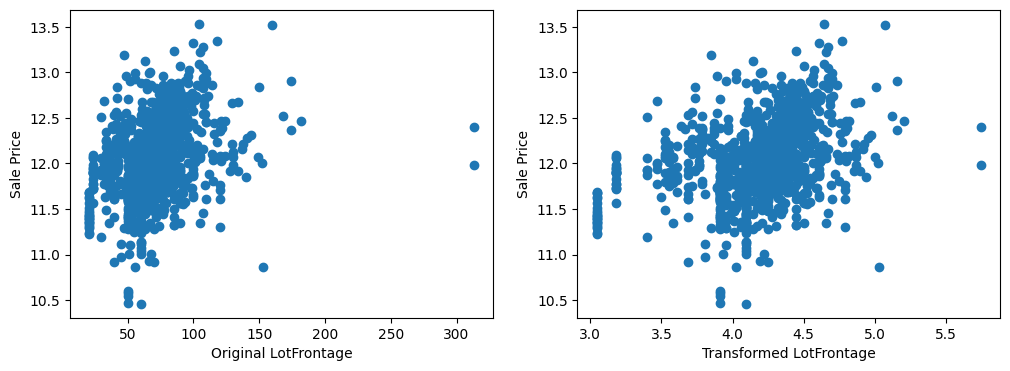

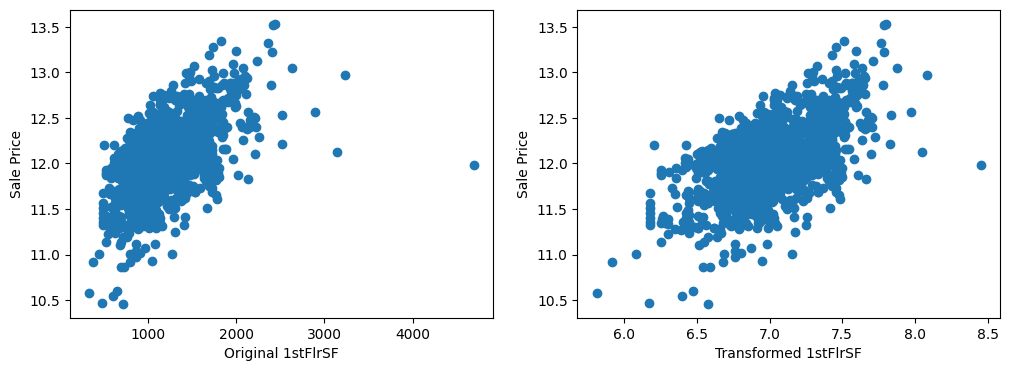

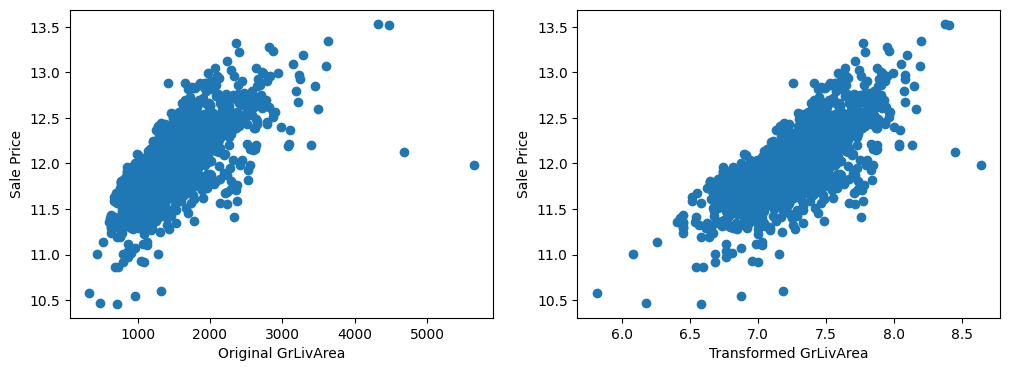

In [36]:


for var in ["LotFrontage", "1stFlrSF", "GrLivArea"]:
    
    plt.figure(figsize=(12,4))
    
    # Grafico de variables originales 
    plt.subplot(1, 2, 1)
    plt.scatter(data[var], np.log(data['SalePrice']))
    plt.ylabel('Sale Price')
    plt.xlabel('Original ' + var)

    # Grafico de variables transformadas
    plt.subplot(1, 2, 2)
    plt.scatter(tmp[var], np.log(tmp['SalePrice']))
    plt.ylabel('Sale Price')
    plt.xlabel('Transformed ' + var)
                
    plt.show()

Se aprecia una mejor relación enttre las variables.

## Cogificar variables sesgadas como categoricas

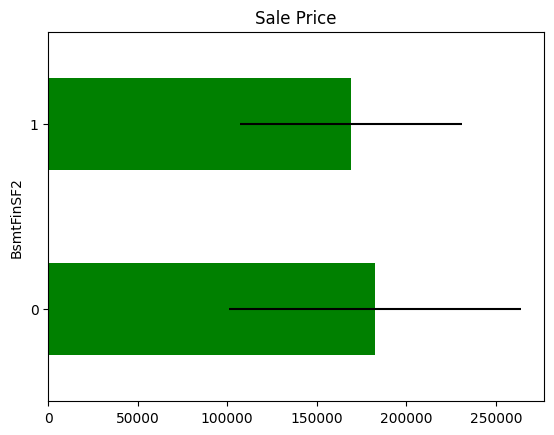

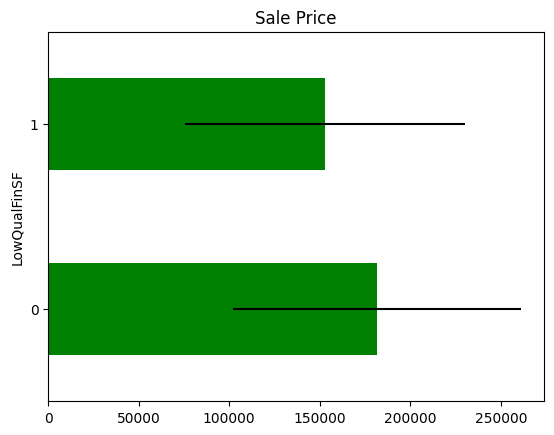

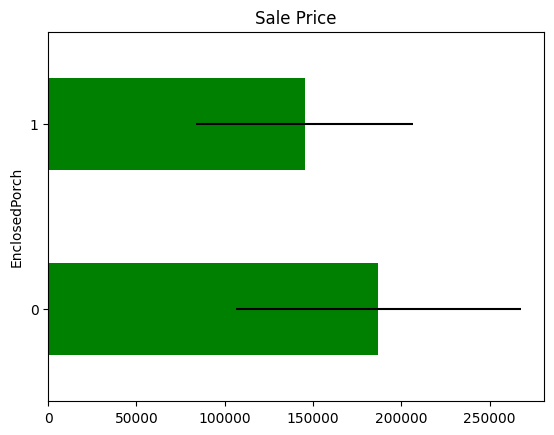

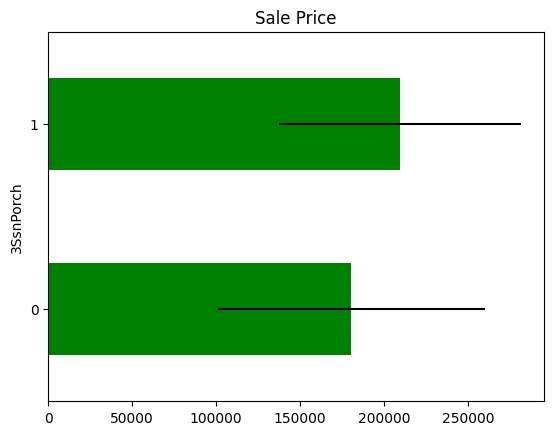

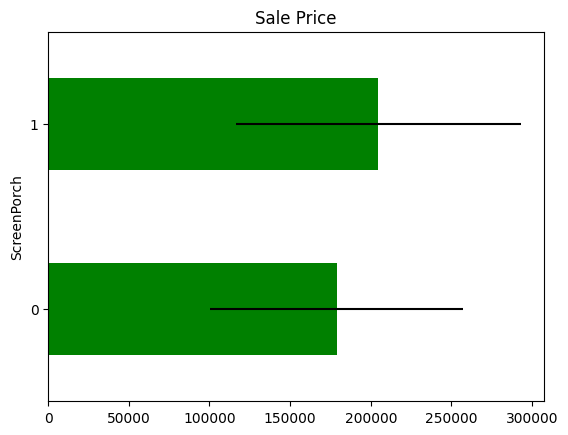

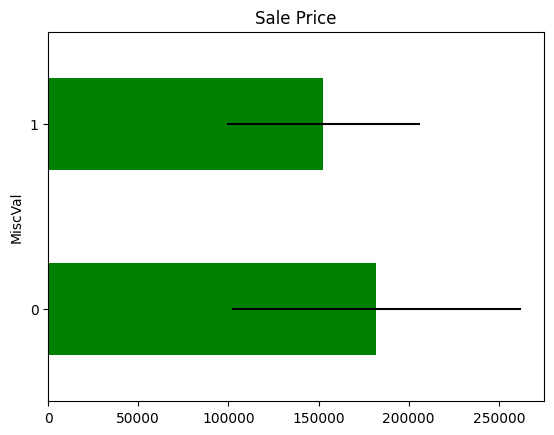

In [37]:
for var in skewed:
    
    tmp = data.copy()
    
    # map the variable values into 0 and 1
    tmp[var] = np.where(data[var]==0, 0, 1)
    
    # determine mean sale price in the mapped values
    tmp = tmp.groupby(var)['SalePrice'].agg(['mean', 'std'])

    # plot into a bar graph
    tmp.plot(kind="barh", y="mean", legend=False,
             xerr="std", title="Sale Price", color='green')

    plt.show()

No se ve diferentes entre los promedios 

# Variables categoricas

<AxesSubplot: >

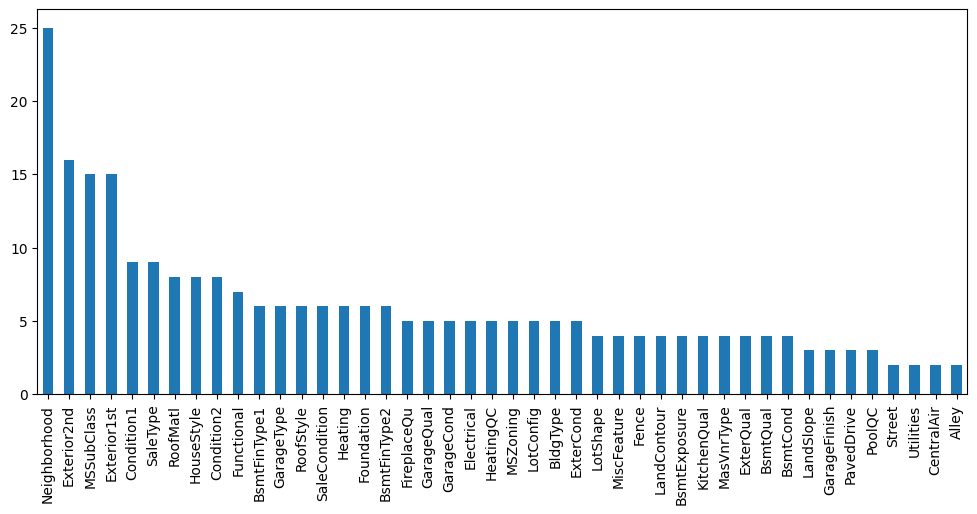

In [39]:
# Explicarion de la cardinalidad de las variables categoricas
data[cat_vars].nunique().sort_values(ascending=False).plot.bar(figsize=(12,5))

Las variables en general tiene baja cardinalidad lo que no requiere abordar cardinalidad

## Variables de calidad

Recedificación de variables categoricas para su posterior uso:

* Ex = Excellent
* Gd = Good
* TA = Average/Typical
* Fa = Fair
* Po = Poor

In [41]:

qual_mappings = {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5, 'Missing': 0, 'NA': 0}

qual_vars = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
             'HeatingQC', 'KitchenQual', 'FireplaceQu',
             'GarageQual', 'GarageCond',
            ]

for var in qual_vars:
    data[var] = data[var].map(qual_mappings)

In [43]:
exposure_mappings = {'No': 1, 'Mn': 2, 'Av': 3, 'Gd': 4, 'Missing': 0, 'NA': 0}

var = 'BsmtExposure'

data[var] = data[var].map(exposure_mappings)

In [44]:
finish_mappings = {'Missing': 0, 'NA': 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6}

finish_vars = ['BsmtFinType1', 'BsmtFinType2']

for var in finish_vars:
    data[var] = data[var].map(finish_mappings)

In [45]:
garage_mappings = {'Missing': 0, 'NA': 0, 'Unf': 1, 'RFn': 2, 'Fin': 3}

var = 'GarageFinish'

data[var] = data[var].map(garage_mappings)

In [46]:
fence_mappings = {'Missing': 0, 'NA': 0, 'MnWw': 1, 'GdWo': 2, 'MnPrv': 3, 'GdPrv': 4}

var = 'Fence'

data[var] = data[var].map(fence_mappings)

In [47]:
# Reunir todas las variables de calidad

qual_vars  = qual_vars + finish_vars + ['BsmtExposure','GarageFinish','Fence']

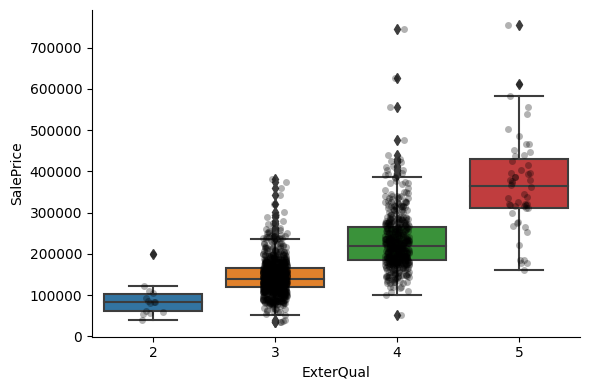

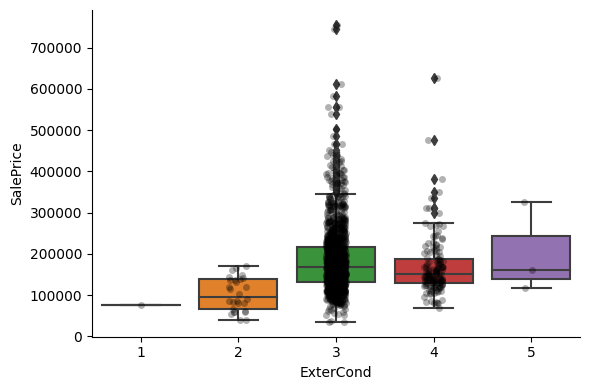

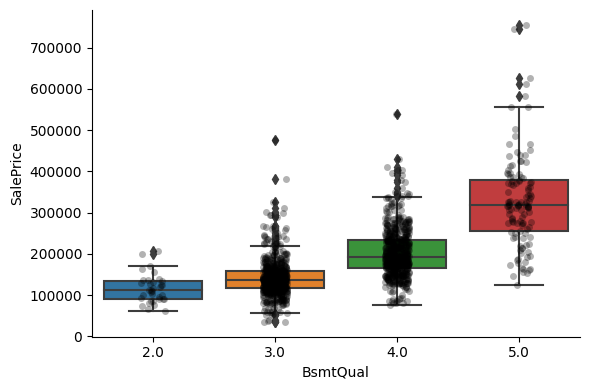

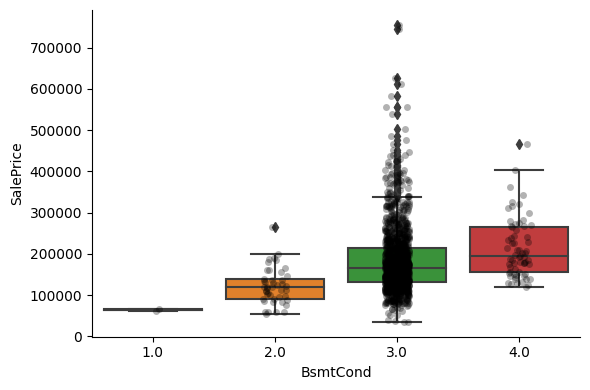

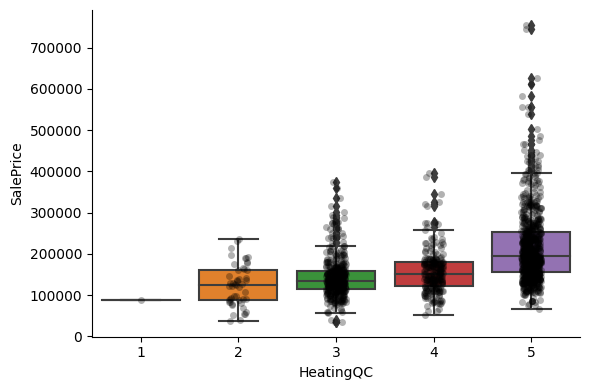

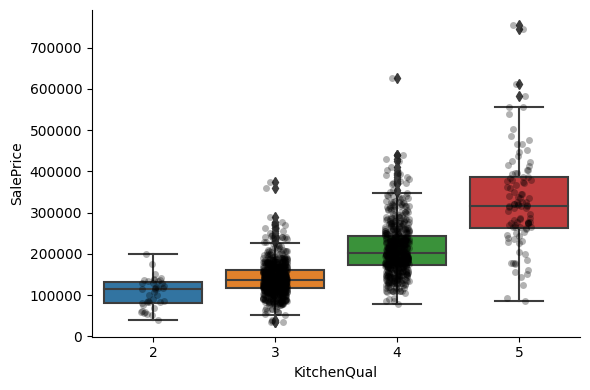

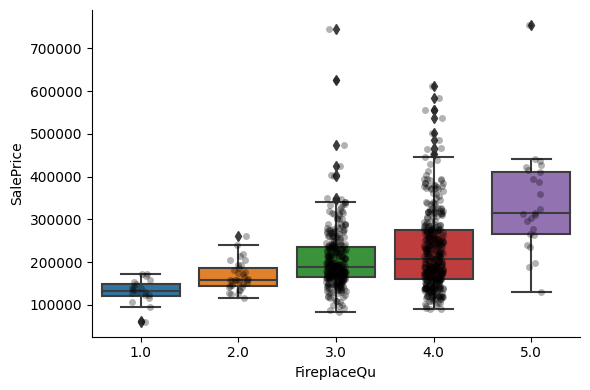

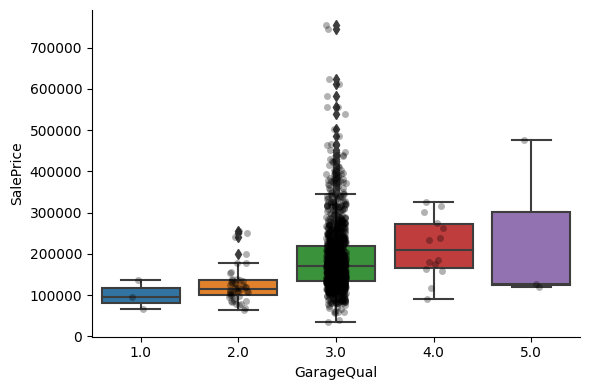

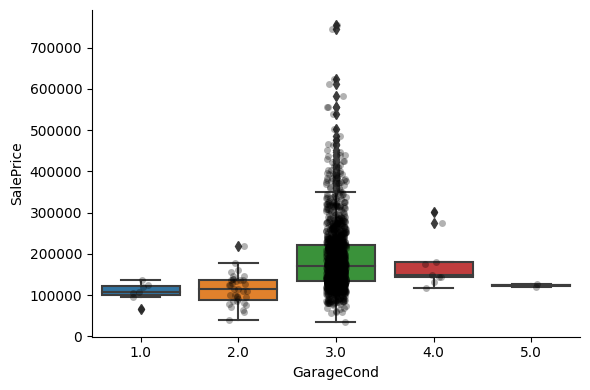

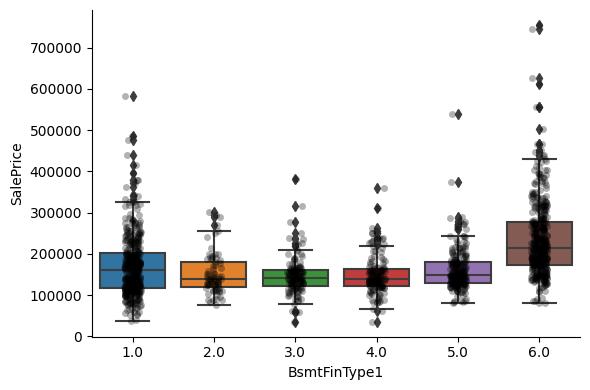

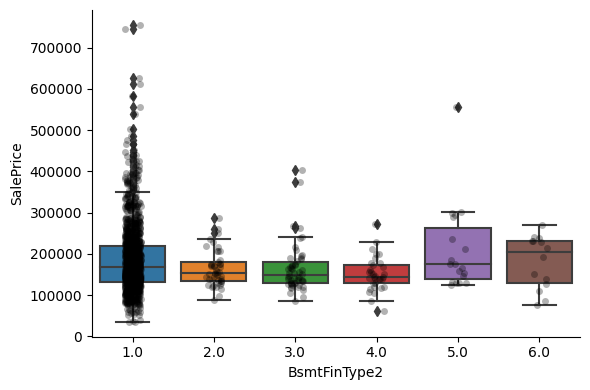

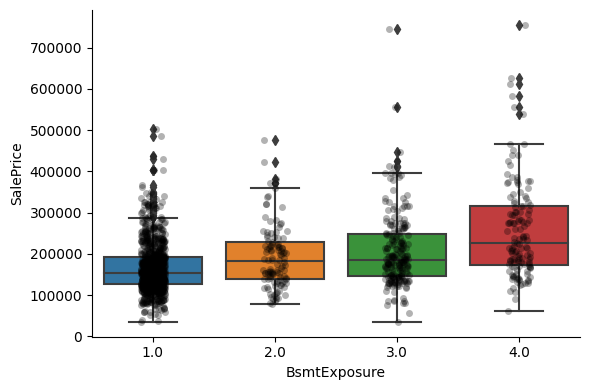

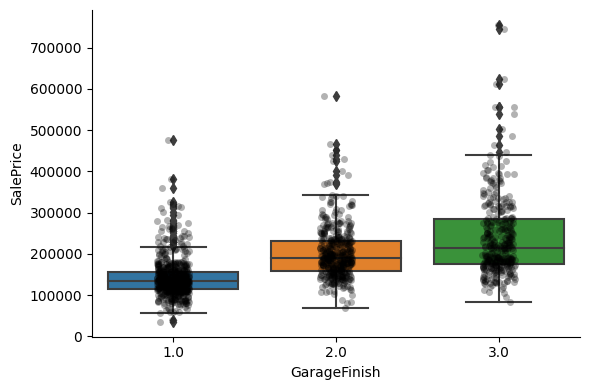

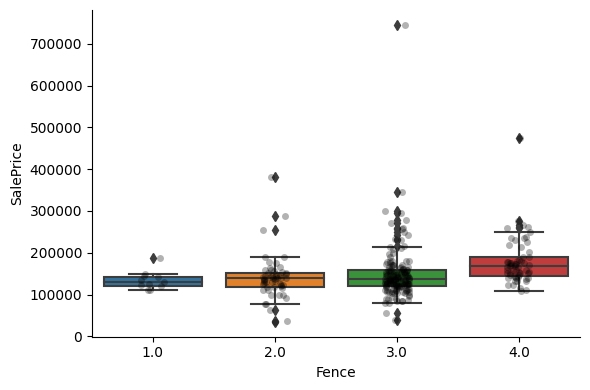

In [48]:
# Se pinta las varibles catrgoricas vs la variable de respuest

for var in qual_vars:
    sns.catplot(x=var, y='SalePrice', data=data, kind="box", height=4, aspect=1.5)
    sns.stripplot(x=var, y='SalePrice', data=data, jitter=0.1, alpha=0.3, color='k')
    plt.show()

# Categorias poco frecuentes
A continuación se busca si hay categorias sun representadas

In [52]:
cat_others = [
    var for var in cat_vars if var not in qual_vars
]

len(cat_others)

30

In [53]:
def analyse_rare_labels(df, var, rare_perc):
    df = df.copy()

    # % de observaciones pro categoria
    tmp = df.groupby(var)['SalePrice'].count() / len(df)

    # Categorias raras
    return tmp[tmp < rare_perc]

# Se imprimen categorias que representan menos del 1% de las observaciones
for var in cat_others:
    print(analyse_rare_labels(data, var, 0.01))
    print()

MSZoning
C (all)    0.006849
Name: SalePrice, dtype: float64

Street
Grvl    0.00411
Name: SalePrice, dtype: float64

Series([], Name: SalePrice, dtype: float64)

LotShape
IR3    0.006849
Name: SalePrice, dtype: float64

Series([], Name: SalePrice, dtype: float64)

Utilities
NoSeWa    0.000685
Name: SalePrice, dtype: float64

LotConfig
FR3    0.00274
Name: SalePrice, dtype: float64

LandSlope
Sev    0.008904
Name: SalePrice, dtype: float64

Neighborhood
Blueste    0.001370
NPkVill    0.006164
Veenker    0.007534
Name: SalePrice, dtype: float64

Condition1
PosA    0.005479
RRAe    0.007534
RRNe    0.001370
RRNn    0.003425
Name: SalePrice, dtype: float64

Condition2
Artery    0.001370
Feedr     0.004110
PosA      0.000685
PosN      0.001370
RRAe      0.000685
RRAn      0.000685
RRNn      0.001370
Name: SalePrice, dtype: float64

Series([], Name: SalePrice, dtype: float64)

HouseStyle
1.5Unf    0.009589
2.5Fin    0.005479
2.5Unf    0.007534
Name: SalePrice, dtype: float64

RoofStyle
Flat

Se deben eliminar las categorias sub representadas, ya qeu estas tienden a causar sobre ajuste en el modelo,

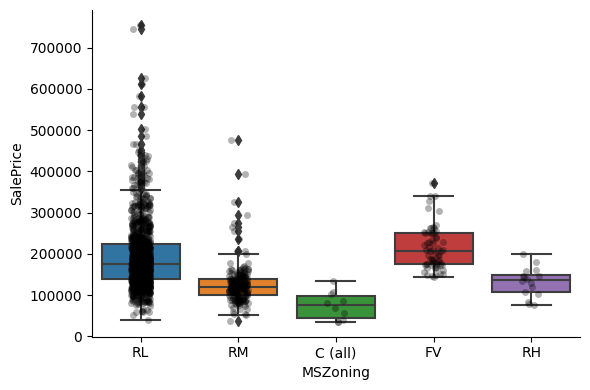

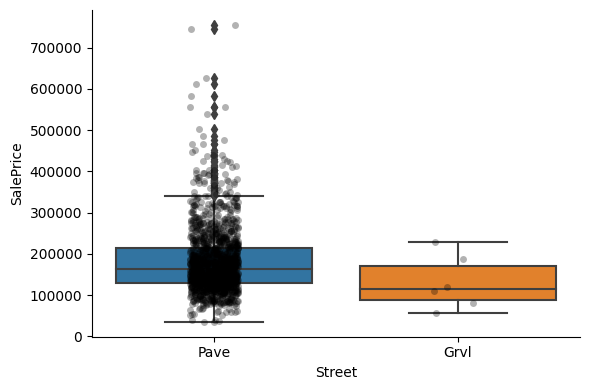

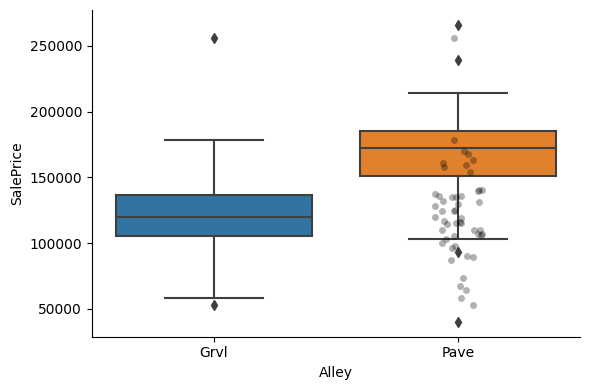

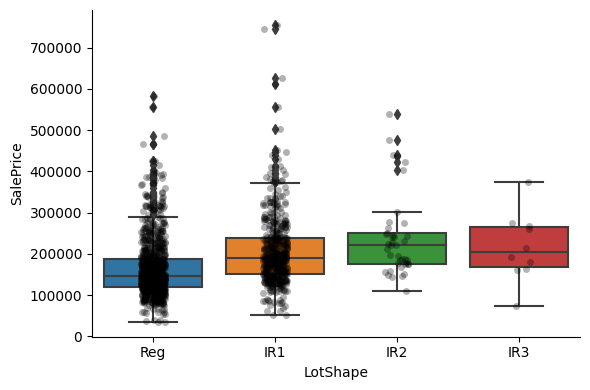

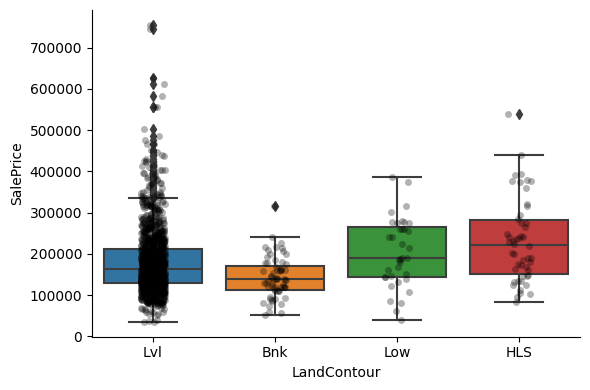

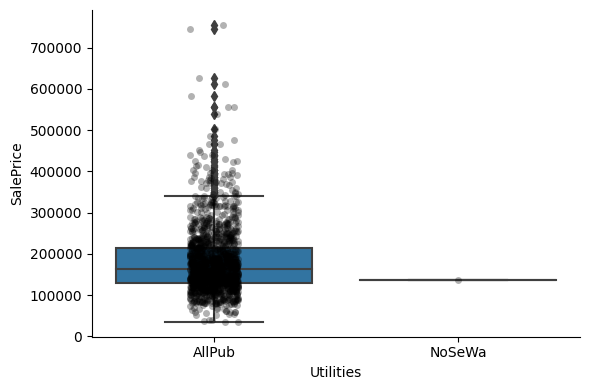

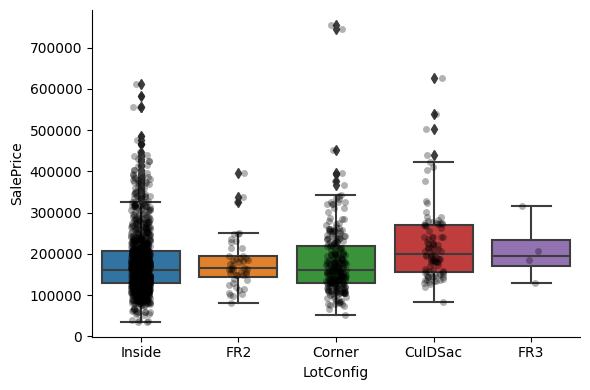

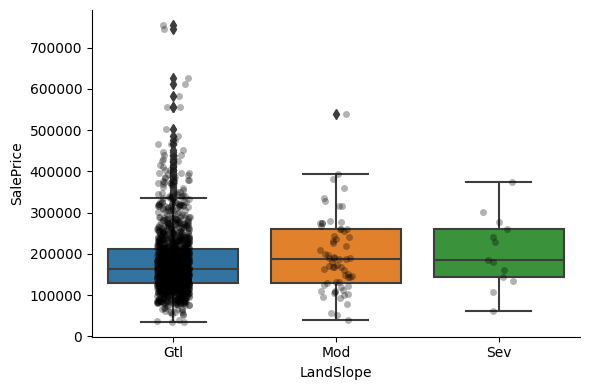

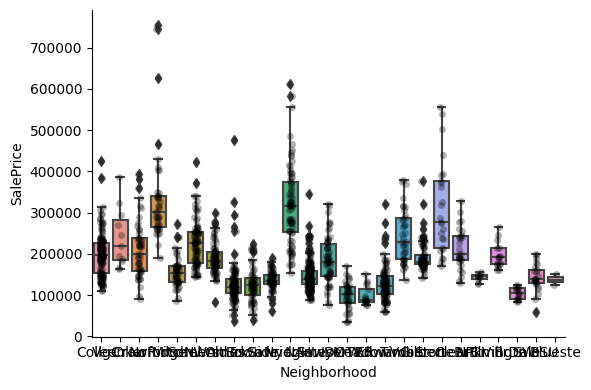

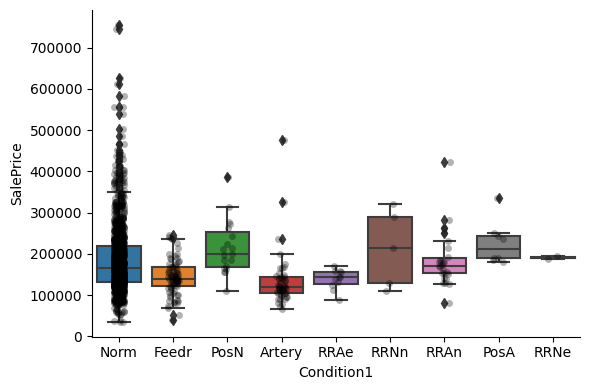

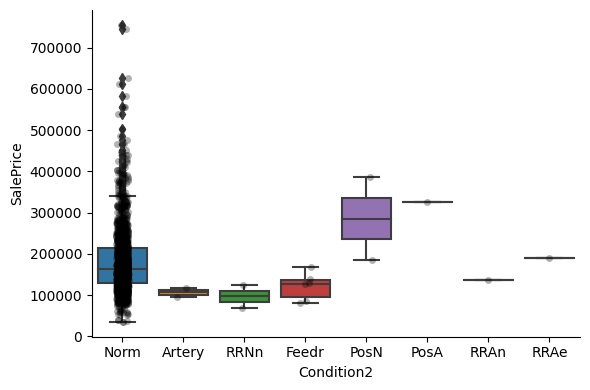

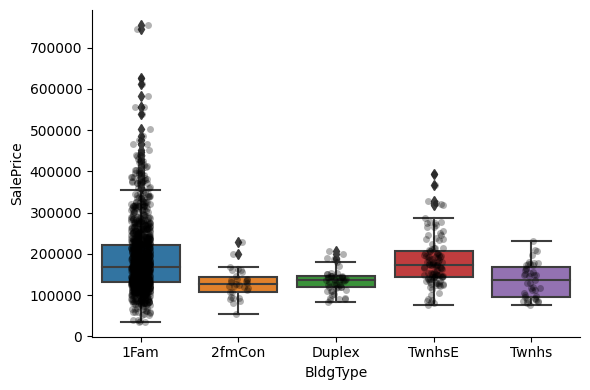

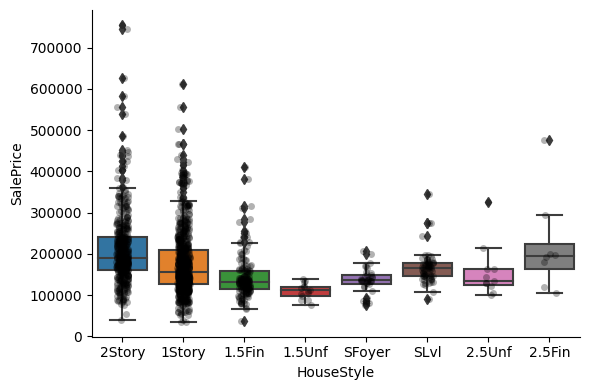

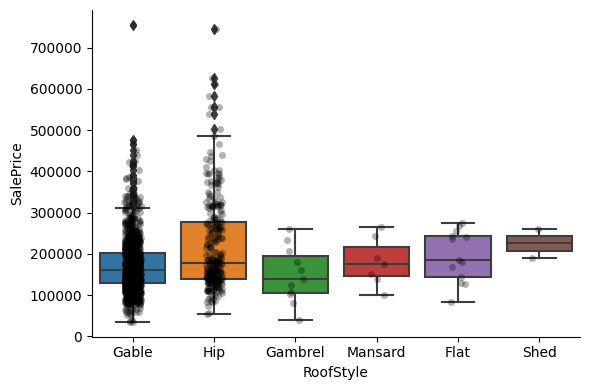

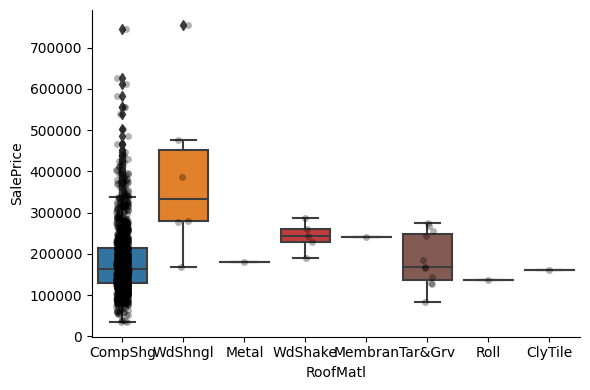

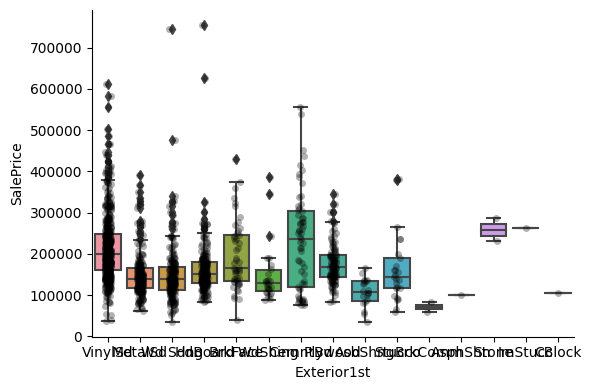

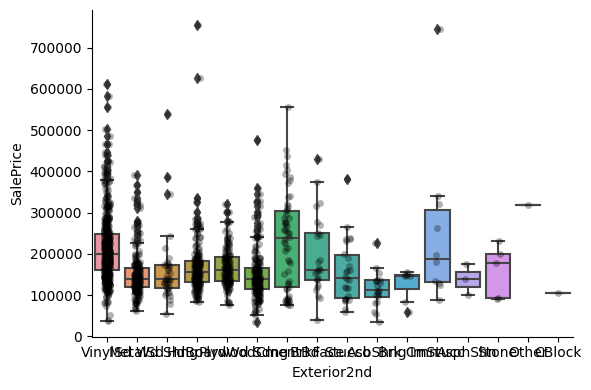

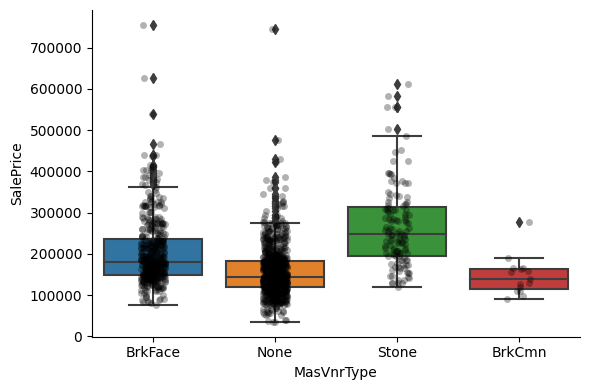

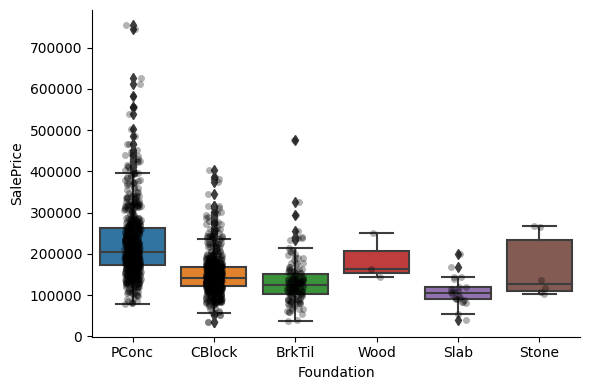

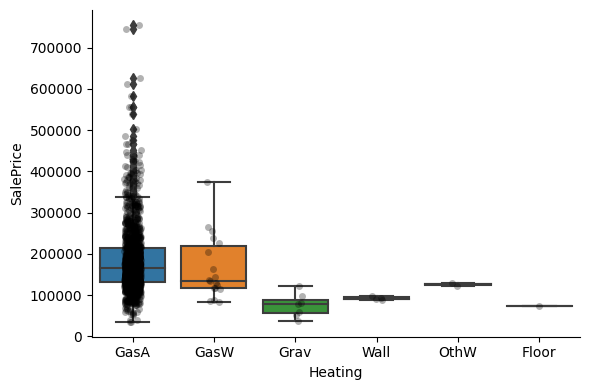

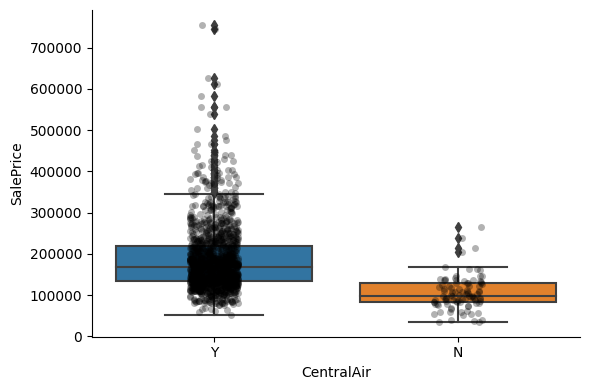

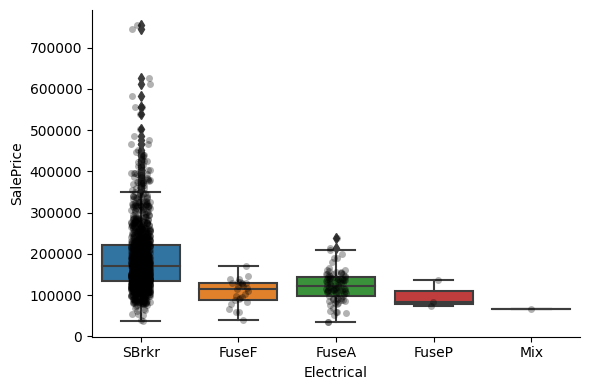

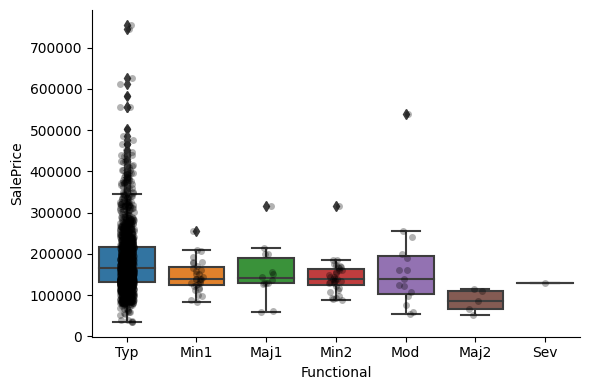

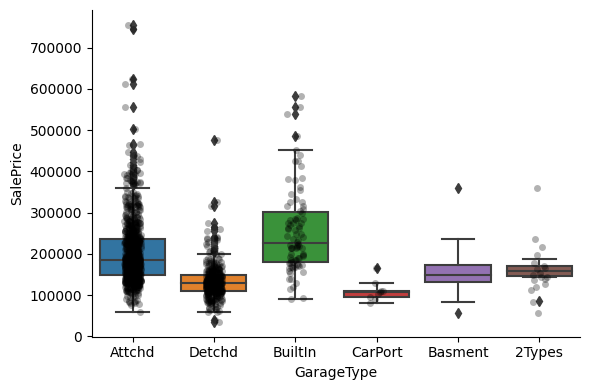

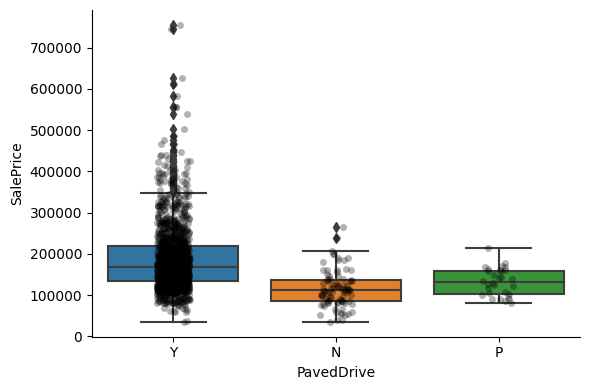

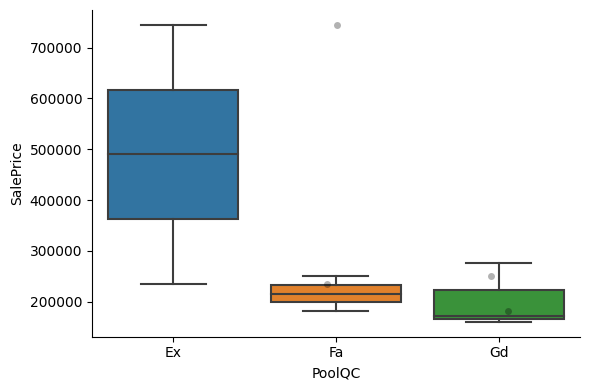

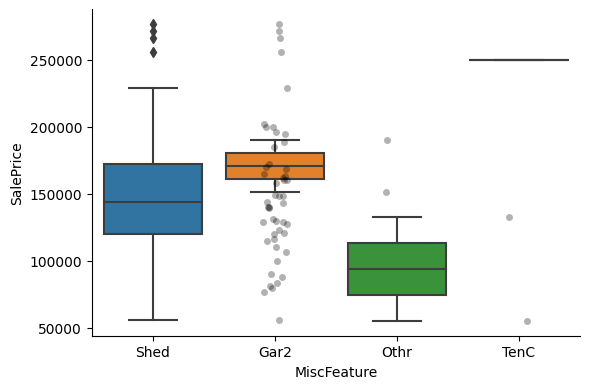

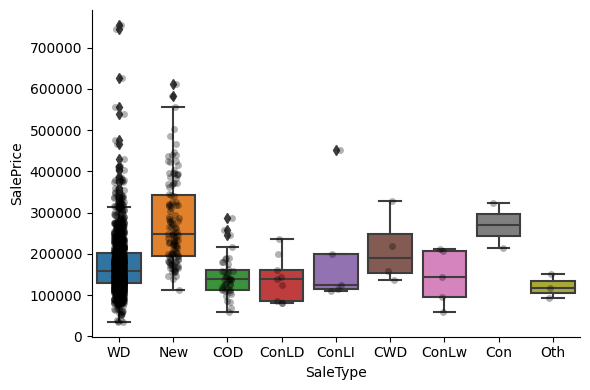

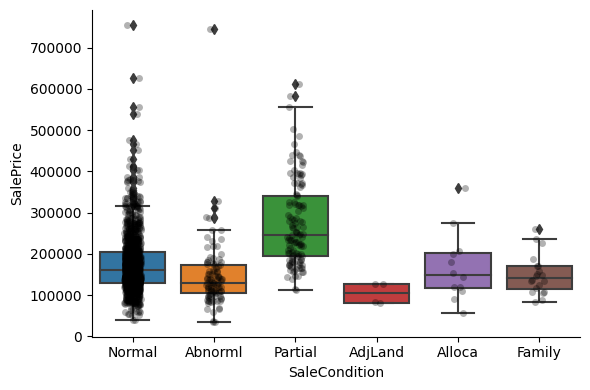

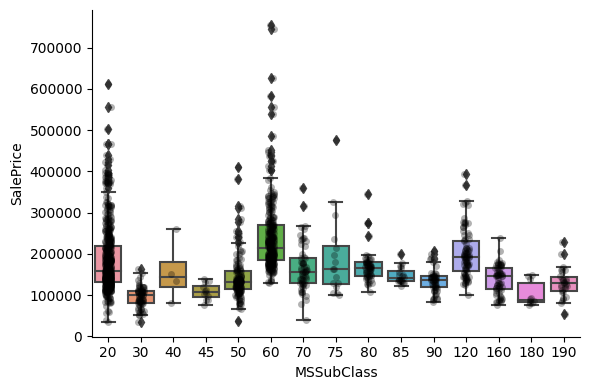

In [54]:

for var in cat_others:
    sns.catplot(x=var, y='SalePrice', data=data, kind="box", height=4, aspect=1.5)
    sns.stripplot(x=var, y='SalePrice', data=data, jitter=0.1, alpha=0.3, color='k')
    plt.show()